# Import Packages

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  !pip install pandas==1.4.2
  print('Running Code in Colab')
# ...or locally
except:
  # define the local directory of the project
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  # root = '/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/'
  print('Running Code locally')

import numpy as np
import pandas as pd
import sys
sys.path.append(root + 'python')
import nutrecon_simulation as sim
import neuroeconomics_jaimeNLL as neconJaime
import neuroeconomics as necon
from variableCoding import Vars
import seaborn as sns
_v_ = Vars()

import plotly.express as px

beahviour_cols = necon.optimize_cols[:-4]

def get_probLottery(group):
  '''
  Missed Trials should be removed and choices should be coded as 0 and 1 (reference and lottery, respectly)
  '''
  prob_lotteryChoice = len(group[group['choice'] == 1]) / len(group)
  return prob_lotteryChoice

Running Code locally
Running Code locally


# Testing Functions & routines

## Task parameters

In [2]:
# # ---------------------------- Levy & Glimcher ------------------------------

# uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# # Same-type & mixed type Trials Lottery probabilities
# st_refPs = [1]                                  # Reference option
# st_lottPs = [0.13, 0.22, 0.38, .50, .75]        # Lottery option

# # Same-type task variables
# st_money_refQs = [2]                            # Dolars
# st_money_lottQs = [2, 4.5, 10, 22.5, 50]        # Dolars

# st_cPlus_refQs = [5]                            # candies
# st_cPlus_refQs = [5, 10, 20, 40, 80]           # candies
# # st_cPlus_lottQs = [2]                          # crackers
# # st_cPlus_lottQs = [2, 5, 10, 20, 40]          # crackers

# st_cMinus_refQs = [60]                          # mL water
# st_cMinus_lottQs = [60, 125, 250, 500, 1000]    # mL water

# # Mixed-type task variables
# mt_refQs = [.2]                                 # Dolars
# mt_refPs = [1]
# mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

# mt_cPlus_lottQs = [10, 20, 30, 50,  80]         # candies
# # mt_cPlus_lottQs = [5, 10, 15, 25,  40]        # candies
# mt_cMinus_lottQs = [125, 250, 400, 600,  1000]  # water 

# ------------------------------ NUTRECON v1 --------------------------------

# uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# # Same-type & mixed type Trials Lottery probabilities
# st_refPs = [1]                              # Reference option
# st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# # Same-type task variables
# st_money_lottQs = [1]                               # Euros
# st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

# st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
# st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

# st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
# st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# # Mixed-type task variables
# mt_refQs = [.2]                                # Euros
# mt_refPs = [1]
# mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

# mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
# mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 

# ------------------------------ NUTRECON v2 --------------------------------

uniqueLott_Nreps= 7      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [2]                               # Euros
st_money_lottQs = [2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 60, 120]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [20, 40, 60, 120]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}\n\nTotal number of trials: {}'.format(allTrials_df['trial_type'].value_counts(), len(allTrials_df)))

Trials per type:
same     420
mixed    280
Name: trial_type, dtype: int64

Total number of trials: 700


In [3]:
# Subject specific parameters
st_money_alpha = 0.7
st_cPlus_alpha = 0.5
st_cMinus_alpha = 0.4

st_money_beta = 5
st_cPlus_beta = st_money_beta
st_cMinus_beta = st_money_beta

mt_cPlus_beta = st_money_beta
mt_cMinus_beta = st_money_beta

cPlus_sFactor = .2
cMinus_sFactor = .2

subject_pars_df = sim._pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                           mt_cPlus_beta, mt_cMinus_beta, cPlus_sFactor, cMinus_sFactor, allTrials_df)
subject_pars_df

trial_type ref_type  ref_qt  ref_prob lott_type  lott_qt  lott_prob  \
0         same    Money     2.0         1     Money        2       0.13   
1         same    Money     2.0         1     Money        2       0.22   
2         same    Money     2.0         1     Money        2       0.38   
3         same    Money     2.0         1     Money        2       0.50   
4         same    Money     2.0         1     Money        2       0.75   
..         ...      ...     ...       ...       ...      ...        ...   
695      mixed    Money     0.2         1       CS-      120       0.13   
696      mixed    Money     0.2         1       CS-      120       0.22   
697      mixed    Money     0.2         1       CS-      120       0.38   
698      mixed    Money     0.2         1       CS-      120       0.50   
699      mixed    Money     0.2         1       CS-      120       0.75   

     ref_alpha  lott_alpha  beta  sFactor  
0          0.7         0.7   5.0      1.0  
1          0.7         0.7   5.0      1.0  
2          0.7         0.7   5.0      1.0  
3          0.7         0.7   5.0      1.0  
4          0.7         0.7   5.0      1.0  
..         ...         ...   ...      ...  
695        0.7         0.4   5.0      0.2  
696        0.7         0.4   5.0      0.2  
697        0.7         0.4   5.0      0.2  
698        0.7         0.4   5.0      0.2  
699        0.7         0.4   5.0      0.2  

[700 rows x 11 columns]

## Subject specific parameters

In [4]:
# Subject specific parameters
st_money_alpha = 0.7
st_cPlus_alpha = 0.5
st_cMinus_alpha = 0.4

st_money_beta = 5
st_cPlus_beta = st_money_beta
st_cMinus_beta = st_money_beta

mt_cPlus_beta = st_money_beta
mt_cMinus_beta = st_money_beta

cPlus_sFactor = .2
cMinus_sFactor = .2

subjectTrials_df = sim._pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, st_money_beta, 
                                              st_cPlus_beta, st_cMinus_beta, mt_cPlus_beta, mt_cMinus_beta, 
                                              cPlus_sFactor, cMinus_sFactor, 
                                              allTrials_df)
subjectTrials_df


trial_type ref_type  ref_qt  ref_prob lott_type  lott_qt  lott_prob  \
0         same    Money     2.0         1     Money        2       0.13   
1         same    Money     2.0         1     Money        2       0.22   
2         same    Money     2.0         1     Money        2       0.38   
3         same    Money     2.0         1     Money        2       0.50   
4         same    Money     2.0         1     Money        2       0.75   
..         ...      ...     ...       ...       ...      ...        ...   
695      mixed    Money     0.2         1       CS-      120       0.13   
696      mixed    Money     0.2         1       CS-      120       0.22   
697      mixed    Money     0.2         1       CS-      120       0.38   
698      mixed    Money     0.2         1       CS-      120       0.50   
699      mixed    Money     0.2         1       CS-      120       0.75   

     ref_alpha  lott_alpha  beta  sFactor  
0          0.7         0.7   5.0      1.0  
1          0.7         0.7   5.0      1.0  
2          0.7         0.7   5.0      1.0  
3          0.7         0.7   5.0      1.0  
4          0.7         0.7   5.0      1.0  
..         ...         ...   ...      ...  
695        0.7         0.4   5.0      0.2  
696        0.7         0.4   5.0      0.2  
697        0.7         0.4   5.0      0.2  
698        0.7         0.4   5.0      0.2  
699        0.7         0.4   5.0      0.2  

[700 rows x 11 columns]

In [5]:
df = subjectTrials_df.copy()

numeric_df = subjectTrials_df.apply(pd.to_numeric, errors='ignore').select_dtypes('float', 'int')

arr = numeric_df.values
arr_labels = numeric_df.columns

In [6]:
columns = ['ref_prob', 'ref_qt', 'ref_alpha', 
           'lott_prob', 'lott_qt', 'lott_alpha', 
           'beta', 'sFactor']

ref_prob_arr = arr[:, arr_labels == columns[0]]
ref_qt_arr = arr[:, arr_labels == columns[1]]
ref_alpha_arr = arr[:, arr_labels == columns[2]]

lott_prob_arr = arr[:, arr_labels == columns[3]]
lott_qt_arr = arr[:, arr_labels == columns[4]]
lott_alpha_arr = arr[:, arr_labels == columns[5]]

beta_arr = arr[:, arr_labels == columns[6]]
sFactor_arr = arr[:, arr_labels == columns[7]]

euR = necon._calculate_EU(ref_prob_arr, ref_qt_arr, ref_alpha_arr)
euL = necon._calculate_EU(lott_prob_arr, lott_qt_arr, lott_alpha_arr)
pL = necon._calculate_pL(euL, euR, beta_arr, sFactor_arr)

In [7]:
# df, columns = ['ref_prob', 'ref_qt', 'ref_alpha', 
#            'lott_prob', 'lott_qt', 'lott_alpha', 
#            'beta', 'sFactor', 'choice']):
    
st_id = 'same'
mt_id = 'mixed'
money_id = 'Money'
cPlus_id = 'CS+'
cMinus_id = 'CS-'

optimize_cols = ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']

def _get_choices(df, columns = ['ref_prob', 'ref_qt', 'ref_alpha', 
           'lott_prob', 'lott_qt', 'lott_alpha', 
           'beta', 'sFactor']):
    
    numeric_df = df.apply(pd.to_numeric, errors='ignore').select_dtypes('float', 'int')

    arr = numeric_df.values
    arr_labels = numeric_df.columns

    ref_prob_arr = arr[:, arr_labels == columns[0]]
    ref_qt_arr = arr[:, arr_labels == columns[1]]
    ref_alpha_arr = arr[:, arr_labels == columns[2]]

    lott_prob_arr = arr[:, arr_labels == columns[3]]
    lott_qt_arr = arr[:, arr_labels == columns[4]]
    lott_alpha_arr = arr[:, arr_labels == columns[5]]

    beta_arr = arr[:, arr_labels == columns[6]]
    sFactor_arr = arr[:, arr_labels == columns[7]]

    euR = necon._calculate_EU(ref_prob_arr, ref_qt_arr, ref_alpha_arr)
    euL = necon._calculate_EU(lott_prob_arr, lott_qt_arr, lott_alpha_arr)
    pL = necon._calculate_pL(euL, euR, beta_arr, sFactor_arr)
    choices = np.random.uniform(size=euR.shape) < pL
    return choices

def _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                 lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                 beta_arr, sFactor_arr, 
                 choice_arr):
    
    euR = ref_prob_arr*ref_qt_arr**ref_alpha_arr 
    euL = lott_prob_arr*lott_qt_arr**lott_alpha_arr

    # Compute things once, sign flip to possibly save one operation
    y = beta_arr*(euR - euL*sFactor_arr)
    chose_ref = choice_arr==False

    # values to be summed up, already negative:
    nll_v = np.log(1 + np.exp(y))
    nll_v[chose_ref] = nll_v[chose_ref] - y[chose_ref]

    return np.sum(nll_v)


def _get_st_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 4:
       print('hello')
       # Three alphas, one beta 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[lott_type_arr == money_id] = st_money_beta
       beta_arr[lott_type_arr == cPlus_id] = st_cPlus_beta
       beta_arr[lott_type_arr == cMinus_id] = st_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood


def _get_mt_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)


    # Unpack params
    if len(params) == 2:
       # two scaling factors
       (cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 4:
       # Two betas and two scaling factors
       (mt_cPlus_beta, mt_cMinus_beta,
        cPlus_sFactor, cMinus_sFactor) = params

       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

       beta_arr[lott_type_arr == cMinus_id] = mt_cPlus_beta
       beta_arr[lott_type_arr == money_id] = mt_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood

def _get_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    trial_type_arr = df[cols[0]].values
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 6:
       # Three alphas, one beta and two scaling factors (beta is unpacked directly)
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta, 
       cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha      # This should never happen
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha    # This should never happen

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == money_id)] = st_money_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cPlus_id)] = st_cPlus_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cMinus_id)] = st_cMinus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == cMinus_id)] = mt_cPlus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == money_id)] = mt_cMinus_beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cPlus_sFactor


    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood



In [8]:
import numpy as np
import random 
import pandas as pd
from scipy.optimize import minimize


st_id = 'same'
mt_id = 'mixed'
money_id = 'Money'
cPlus_id = 'CS+'
cMinus_id = 'CS-'

optimize_cols = ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']

def _get_choices(df, columns = ['ref_prob', 'ref_qt', 'ref_alpha', 
           'lott_prob', 'lott_qt', 'lott_alpha', 
           'beta', 'sFactor']):
    
    numeric_df = df.apply(pd.to_numeric, errors='ignore').select_dtypes('float', 'int')

    arr = numeric_df.values
    arr_labels = numeric_df.columns

    ref_prob_arr = arr[:, arr_labels == columns[0]]
    ref_qt_arr = arr[:, arr_labels == columns[1]]
    ref_alpha_arr = arr[:, arr_labels == columns[2]]

    lott_prob_arr = arr[:, arr_labels == columns[3]]
    lott_qt_arr = arr[:, arr_labels == columns[4]]
    lott_alpha_arr = arr[:, arr_labels == columns[5]]

    beta_arr = arr[:, arr_labels == columns[6]]
    sFactor_arr = arr[:, arr_labels == columns[7]]

    euR = necon._calculate_EU(ref_prob_arr, ref_qt_arr, ref_alpha_arr)
    euL = necon._calculate_EU(lott_prob_arr, lott_qt_arr, lott_alpha_arr)
    pL = necon._calculate_pL(euL, euR, beta_arr, sFactor_arr)
    choices = np.random.uniform(size=euR.shape) < pL
    return choices

def _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                 lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                 beta_arr, sFactor_arr, 
                 choice_arr):
    
    euR = ref_prob_arr*ref_qt_arr**ref_alpha_arr 
    euL = lott_prob_arr*lott_qt_arr**lott_alpha_arr

    # Compute things once, sign flip to possibly save one operation
    y = beta_arr*(euR - euL*sFactor_arr)
    chose_ref = choice_arr==False

    # values to be summed up, already negative:
    nll_v = np.log(1 + np.exp(y))
    nll_v[chose_ref] = nll_v[chose_ref] - y[chose_ref]

    return np.sum(nll_v)


def _get_st_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 4:
       print('hello')
       # Three alphas, one beta 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[lott_type_arr == money_id] = st_money_beta
       beta_arr[lott_type_arr == cPlus_id] = st_cPlus_beta
       beta_arr[lott_type_arr == cMinus_id] = st_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood


def _get_mt_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)


    # Unpack params
    if len(params) == 2:
       # two scaling factors
       (cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 4:
       # Two betas and two scaling factors
       (mt_cPlus_beta, mt_cMinus_beta,
        cPlus_sFactor, cMinus_sFactor) = params

       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

       beta_arr[lott_type_arr == cMinus_id] = mt_cPlus_beta
       beta_arr[lott_type_arr == money_id] = mt_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood

def _get_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    trial_type_arr = df[cols[0]].values
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 6:
       # Three alphas, one beta and two scaling factors (beta is unpacked directly)
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta, 
       cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha      # This should never happen
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha    # This should never happen

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == money_id)] = st_money_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cPlus_id)] = st_cPlus_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cMinus_id)] = st_cMinus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == cMinus_id)] = mt_cPlus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == money_id)] = mt_cMinus_beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cPlus_sFactor


    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood

def stepwise_estimate_MultiOpt(args, x0, N_optimizers):

    def _get_iter_params(xk):
        iter_params_list.append(xk.tolist())
    
    df = args
    st_mask = df[optimize_cols[0]] == 'same'
    mt_mask = df[optimize_cols[0]] == 'mixed'

    cPlus_mask = df[optimize_cols[4]] == 'CS+'
    cMinus_mask = df[optimize_cols[4]] == 'CS-'

    # Unpack initialization parameters
    if len(x0) == 6:
        (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta,
            cPlus_sFactor, cMinus_sFactor) = x0
        st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                    beta)
        mt_params = (cPlus_sFactor, cMinus_sFactor)
        st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                                'beta']
        mt_params_colNames = ['CS+ sFactor', 'CS- sFactor']
    elif len(x0) == 10:
        (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta,
            mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor) = x0
        st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                    st_money_beta, st_cPlus_beta, st_cMinus_beta)
        mt_params = (mt_cPlus_beta, mt_cMinus_beta,
                    cPlus_sFactor, cMinus_sFactor)
        st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                                'Money beta', 'CS+ st beta', 'CS- st beta', ]
        mt_params_colNames = ['CS+ mt beta', 'CS- mt beta',
                                'CS+ sFactor', 'CS- sFactor']

    for n_opt in range(N_optimizers):
        x0_st_params = tuple([random.uniform(*pars) for pars in st_params])
        # Estimate parameters from Same type trials
        iter_params_list = []
        res_st_ = minimize(_get_st_nll, x0_st_params, args=df.loc[st_mask,:],
                            callback=_get_iter_params)
        if n_opt == 0:
            res_st = res_st_
        else:
            if res_st_.fun < res_st.fun:
                res_st = res_st_

    st_iterParams_df = pd.DataFrame(iter_params_list, columns=st_params_colNames)

    # map same type estimation results to required fields
    df.loc[mt_mask, optimize_cols[8]] = res_st.x[0]                 # Money alpha
    df.loc[mt_mask & cPlus_mask, optimize_cols[9]] = res_st.x[1]    # CS+ alpha
    df.loc[mt_mask & cMinus_mask, optimize_cols[9]] = res_st.x[2]   # CS- alpha
    if len(x0) == 6:
        df.loc[mt_mask, optimize_cols[10]] = res_st.x[3]              # beta
    for n_opt in range(N_optimizers):
        x0_mt_params = tuple([random.uniform(*pars) for pars in mt_params])
        # Estimate parameters from mixed type trials
        iter_params_list = []
        res_mt_ = minimize(_get_mt_nll, x0_mt_params, args=df.loc[mt_mask,:],
                            callback=_get_iter_params)
        if n_opt == 0:
            res_mt = res_mt_
        else:
            if res_mt_.fun < res_st.fun:
                res_mt = res_mt_
    mt_iterParams_df = pd.DataFrame(iter_params_list, columns=mt_params_colNames)

    return res_st, res_mt, st_iterParams_df, mt_iterParams_df

### Simulate choices

In [9]:
seed = 1
np.random.seed(seed)

In [10]:
subjectTrials_df = sim._get_subject_choices(subjectTrials_df)



subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()

title = 'Choices'

hover_cols = ['lott_type']
hover_data = {key:False for key in subject_choiceCount_df.columns}

fig = px.line(subject_choiceCount_df, facet_col = 'lott_type', facet_row = 'trial_type',
            x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
            color='lott_prob',  markers=True,
            symbol = 'lott_prob', 
            color_discrete_sequence = px.colors.sequential.dense,
            hover_data = hover_data, 
            category_orders= {
                        'lottery p': sorted(list(subject_choiceCount_df[beahviour_cols[-2]].unique())),
                        }
                )
fig.update_layout(
    title = title,
    legend_title="Subject ID, reward",
)                                
fig.update_xaxes(matches=None)

fig.show()

## Parameter Estimation

In [11]:
alphaMoney0 = st_money_alpha
alphaCplus0 = st_cPlus_alpha
alphaCminus0 = st_cMinus_alpha
st_betaMoney0 = st_money_beta # also used in model with only one beta
st_betaCplus0 = st_cPlus_beta
st_betaCminus0 = st_cMinus_beta
mt_betaCplus0 = mt_cPlus_beta
mt_betaCminus0 = mt_cMinus_beta
sFactorCplus0 = cPlus_sFactor
sFactorCminus0= cMinus_sFactor


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

### Likelihood calculation

In [12]:
# Checking if Likelihood calculation is working for simultaneous estimation and 6 parameters

df = subjectTrials_df.copy()

x0 = x0_6params

df['likelihood'] = df.apply(lambda row: necon._get_likelihood(row, x0), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [13]:
# Checking if Likelihood calculation is working for simultaneous estimation and 10 parameters


df = subjectTrials_df.copy()

x0 = x0_10params


df['likelihood'] = df.apply(lambda row: necon._get_likelihood(row, x0), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')


Likelihood well calculated.


In [14]:
# Checking if Likelihood calculation is working for stepwise estimation and 6 parameters
df = subjectTrials_df.copy()

x0 = x0_6params

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    beta,
    cPlus_sFactor, cMinus_sFactor) = x0
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta)
mt_params = (cPlus_sFactor, cMinus_sFactor)


st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: necon._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha
beta_est = st_money_beta

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est
df.loc[mt_mask, sim.optimize_cols[10]] = beta_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: necon._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [15]:
# Checking if Likelihood calculation is working for stepwise estimation and 10 parameters

df = subjectTrials_df.copy()

x0 = x0_10params


(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    st_money_beta, st_cPlus_beta, st_cMinus_beta,
    mt_cPlus_beta, mt_cMinus_beta,
    cPlus_sFactor, cMinus_sFactor) = x0_10params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta)
mt_params = (mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor)

st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: necon._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: necon._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']

if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


### Likelihood calculation as Jaime

In [16]:
df. columns

Index(['trial_type', 'ref_type', 'ref_qt', 'ref_prob', 'lott_type', 'lott_qt',
       'lott_prob', 'ref_alpha', 'lott_alpha', 'beta', 'sFactor', 'ref_EU',
       'lott_EU', 'pL', 'choice', 'likelihood', 'ref_alpha_est',
       'lott_alpha_est'],
      dtype='object')

In [17]:
# Checking if Likelihood calculation is working for simultaneous estimation and 6 parameters

df = subjectTrials_df.copy()
# df = df[(df['trial_type'] == 'mixed') & 
#         (df['lott_type'] == 'CS+')]

x0 = x0_6params

df['nll_jaime'] = df.apply(lambda row: neconJaime._get_likelihood(row, x0), axis = 1)

tmp_df = df[['pL', 'lott_EU','choice', 'nll_jaime']].copy()
tmp_df['lott_EU'] = (tmp_df['lott_EU']/tmp_df['lott_EU'].max()) * 20

tmp_df['nll_jaime'] = tmp_df['nll_jaime']

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'from pL'] = -np.log(1 - tmp_df.loc[mask_0,'pL'])
tmp_df.loc[mask_1,'from pL'] = -np.log(tmp_df.loc[mask_1,'pL'])
tmp_df['check'] = tmp_df['from pL'] - tmp_df['nll_jaime']

if tmp_df['check'].round(10).max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')


# tmp_longdf = tmp_df.melt(id_vars=['pL', 'choice'], var_name='Computation', value_name='NegLogLikelihood' ).sort_values(by=['Computation', 'pL'])

# fig = px.line(tmp_longdf, x = 'pL', y = 'NegLogLikelihood', 
#               color = 'Computation', line_dash='choice', text='choice', symbol='choice')
# # create a dictionary that maps each unique value in the 'choice' column to a specific color
# color_map = {choice: color for choice, color in zip(tmp_longdf['choice'].unique(), px.colors.qualitative.Pastel)}

# fig.update_traces(mode='markers+lines', 
                #   marker=dict(size=12, color=[color_map[x] for x in tmp_longdf['choice']]))



fig.show()

Likelihood well calculated.


In [18]:
tmp_df

pL    lott_EU  choice  nll_jaime   from pL         check
0    0.000852   0.514094       0   0.000853  0.000853 -4.580754e-16
1    0.001769   0.870005       0   0.001771  0.001771  1.546072e-16
2    0.006458   1.502736       0   0.006479  0.006479 -4.336809e-18
3    0.016936   1.977284       0   0.017081  0.017081 -2.359224e-16
4    0.116024   2.965926       0   0.123326  0.123326 -8.326673e-17
..        ...        ...     ...        ...       ...           ...
695  0.323363   2.147801       0   0.390621  0.390621  0.000000e+00
696  0.468159   3.634739       0   0.631411  0.631411 -3.330669e-16
697  0.722796   6.278186       0   1.283000  1.283000 -2.220446e-16
698  0.854806   8.260772       1   0.156881  0.156881 -5.551115e-17
699  0.969808  12.391157       1   0.030657  0.030657 -1.387779e-17

[700 rows x 6 columns]

In [19]:
# Checking if Likelihood calculation is working for simultaneous estimation and 10 parameters


df = subjectTrials_df.copy()

x0 = x0_10params


df['likelihood'] = df.apply(lambda row: necon._get_likelihood(row, x0), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')


Likelihood well calculated.


In [20]:
# Checking if Likelihood calculation is working for stepwise estimation and 6 parameters
df = subjectTrials_df.copy()

x0 = x0_6params

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    beta,
    cPlus_sFactor, cMinus_sFactor) = x0
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta)
mt_params = (cPlus_sFactor, cMinus_sFactor)


st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: necon._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha
beta_est = st_money_beta

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est
df.loc[mt_mask, sim.optimize_cols[10]] = beta_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: necon._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [21]:
# Checking if Likelihood calculation is working for stepwise estimation and 10 parameters

df = subjectTrials_df.copy()

x0 = x0_10params


(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    st_money_beta, st_cPlus_beta, st_cMinus_beta,
    mt_cPlus_beta, mt_cMinus_beta,
    cPlus_sFactor, cMinus_sFactor) = x0_10params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta)
mt_params = (mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor)

st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: necon._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: necon._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']

if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


### Model Fit

In [22]:
alphaMoney0 = st_money_alpha
alphaCplus0 = st_cPlus_alpha
alphaCminus0 = st_cMinus_alpha
st_betaMoney0 = st_money_beta # also used in model with only one beta
st_betaCplus0 = st_cPlus_beta
st_betaCminus0 = st_cMinus_beta
mt_betaCplus0 = mt_cPlus_beta
mt_betaCminus0 = mt_cMinus_beta
sFactorCplus0 = cPlus_sFactor
sFactorCminus0= cMinus_sFactor

# alphaMoney0 = 1
# alphaCplus0 = 1
# alphaCminus0 = 1
# st_betaMoney0 = 1 # also used in model with only one beta
# st_betaCplus0 = 1
# st_betaCminus0 = 1
# mt_betaCplus0 = 1
# mt_betaCminus0 = 1
# sFactorCplus0 = 1
# sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

In [23]:

args = (subjectTrials_df.copy())


res_st, res_mt, st_iterParams_df, mt_iterParams_df = sim.stepwise_estimate(args, x0_6params)

sim.print_stepwiseModel_output(res_st, res_mt)



AttributeError: module 'nutrecon_simulation' has no attribute 'stepwise_estimate'

In [24]:
args = (subjectTrials_df.copy())
res_st, res_mt, st_iterParams_df, mt_iterParams_df = sim.stepwise_estimate(args, x0_10params)
sim.print_stepwiseModel_output(res_st, res_mt)

AttributeError: module 'nutrecon_simulation' has no attribute 'stepwise_estimate'

In [25]:
res = sim.simultaneous_estimate(args, x0_6params)
sim.print_simultaneousModel_output(res)

AttributeError: module 'nutrecon_simulation' has no attribute 'simultaneous_estimate'

In [26]:
res = sim.simultaneous_estimate(args, x0_10params)
sim.print_simultaneousModel_output(res)

AttributeError: module 'nutrecon_simulation' has no attribute 'simultaneous_estimate'

# Simulate behaviour and look at choices here

## Task Parameters

In [27]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Initialization Parameters

In [28]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

## Run simulation and plot behaviour

In [15]:
beahviour_cols[:-1]

['trial_type',
 'ref_type',
 'ref_qt',
 'ref_prob',
 'lott_type',
 'lott_qt',
 'lott_prob']

100%|██████████| 100/100 [00:08<00:00, 12.20it/s]


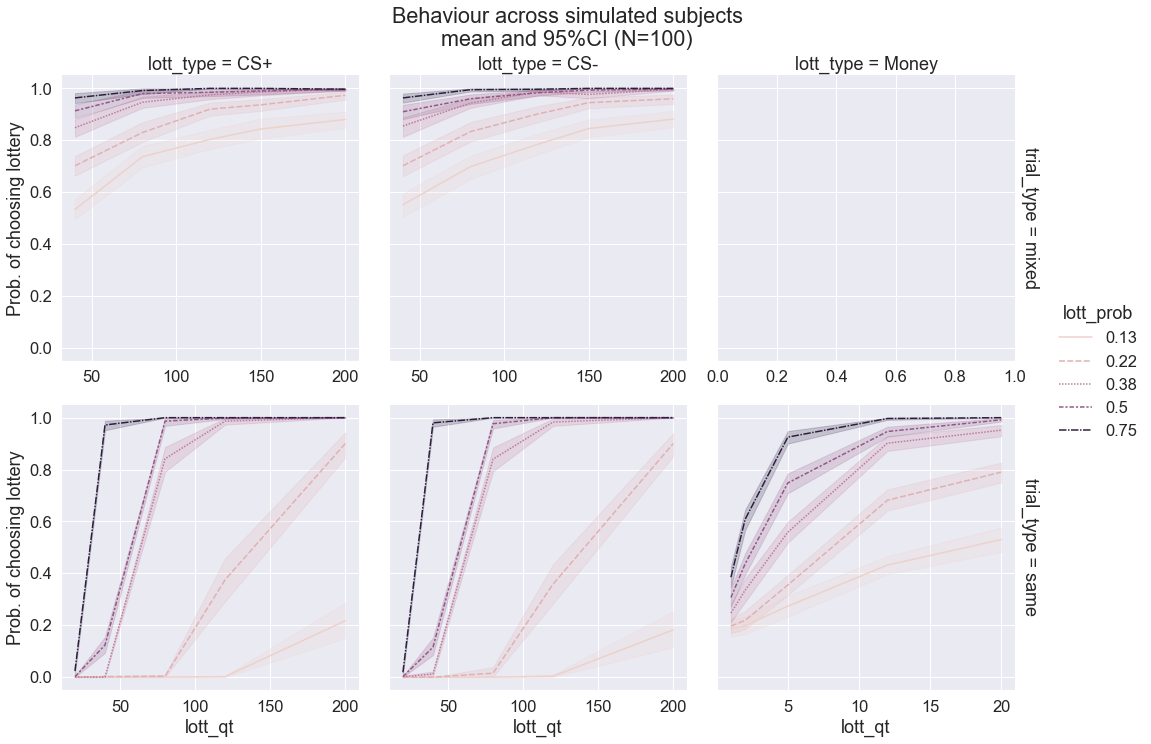

In [52]:
from tqdm import tqdm
from numpy import random

N_subs = 100
x0 = x0_10params

#                         (mean, sd, N_subs)
mean_std_st_money_alpha = (0.7, 0.1, N_subs)
mean_std_st_cPlus_alpha = (0.8, 0.1, N_subs)
mean_std_st_cMinus_alpha = (0.8, 0.1, N_subs)
mean_std_st_money_beta = (1.8, 0.3, N_subs)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = mean_std_st_money_beta
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.2, 0.05, N_subs)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

st_money_alpha_arr = abs(random.normal(*mean_std_st_money_alpha))
st_cPlus_alpha_arr = abs(random.normal(*mean_std_st_cPlus_alpha))
st_cMinus_alpha_arr = abs(random.normal(*mean_std_st_cMinus_alpha))
st_money_beta_arr = abs(random.normal(*mean_std_st_money_beta))

cPlus_sFactor_arr = abs(random.normal(*mean_std_cPlus_sFactor))
cMinus_sFactor_arr = abs(random.normal(*mean_std_cMinus_sFactor))

if x0 == x0_6params:
    st_param_size = 4
    mt_param_size = 2
    st_cPlus_beta_arr = st_money_beta_arr
    st_cMinus_beta_arr = st_money_beta_arr
    mt_cPlus_beta_arr = st_money_beta_arr
    mt_cMinus_beta_arr = st_money_beta_arr
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr,] )

    mt_pars = np.stack([cPlus_sFactor_arr, cMinus_sFactor_arr])
    
else:    
    st_param_size = 6
    mt_param_size = 4
    st_cPlus_beta_arr = abs(random.normal(*mean_std_st_cPlus_beta))
    st_cMinus_beta_arr = abs(random.normal(*mean_std_st_cMinus_beta))
    mt_cPlus_beta_arr = abs(random.normal(*mean_std_mt_cPlus_beta))
    mt_cMinus_beta_arr = abs(random.normal(*mean_std_mt_cMinus_beta))
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                    ] )

    mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                        cPlus_sFactor_arr, cMinus_sFactor_arr])
    
st_flags = []
mt_flags = []


st_estPars = np.zeros((st_param_size, N_subs))
mt_estPars = np.zeros((mt_param_size, N_subs))
st_hessians = np.zeros((st_param_size, st_param_size, N_subs))
mt_hessians = np.zeros((mt_param_size, mt_param_size, N_subs))

import warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(N_subs)):
    # Get parameters per participant
    st_money_alpha = st_money_alpha_arr[i]
    st_cPlus_alpha = st_cPlus_alpha_arr[i]
    st_cMinus_alpha = st_cMinus_alpha_arr[i]
    st_money_beta = st_money_beta_arr[i]
    st_cPlus_beta = st_cPlus_beta_arr[i]
    st_cMinus_beta = st_cMinus_beta_arr[i]
    mt_cPlus_beta = mt_cPlus_beta_arr[i]
    mt_cMinus_beta = mt_cMinus_beta_arr[i]
    cPlus_sFactor = cPlus_sFactor_arr[i]
    cMinus_sFactor = cMinus_sFactor_arr[i]

    subjectTrials_df = sim.pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                                                  st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                                                  mt_cPlus_beta, mt_cMinus_beta, 
                                                  cPlus_sFactor, cMinus_sFactor, 
                                                  allTrials_df)
    
    _subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()
    _subject_choiceCount_df['iter'] = i
    
    if i == 0:
        subject_choiceCount_df = _subject_choiceCount_df
    else:
        subject_choiceCount_df = pd.concat([subject_choiceCount_df, _subject_choiceCount_df], axis = 0)
        
import seaborn as sns
sns.set(font_scale=1.5)
g = sns.relplot(
    data=subject_choiceCount_df.reset_index(drop=True), x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
    col="lott_type", row = 'trial_type',
    hue="lott_prob", style="lott_prob", kind="line",facet_kws={'sharex': False, 'margin_titles' : True},
)

g.fig.suptitle('Behaviour across simulated subjects\nmean and 95%CI (N={})'.format(N_subs), va='bottom');

# Test Fits

## Start from parameter used for choice simulation

### Task Parameters

In [116]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


### Initialization Parameters

In [117]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

Starting optimization from true parameters


100%|██████████| 5/5 [00:11<00:00,  2.31s/it]


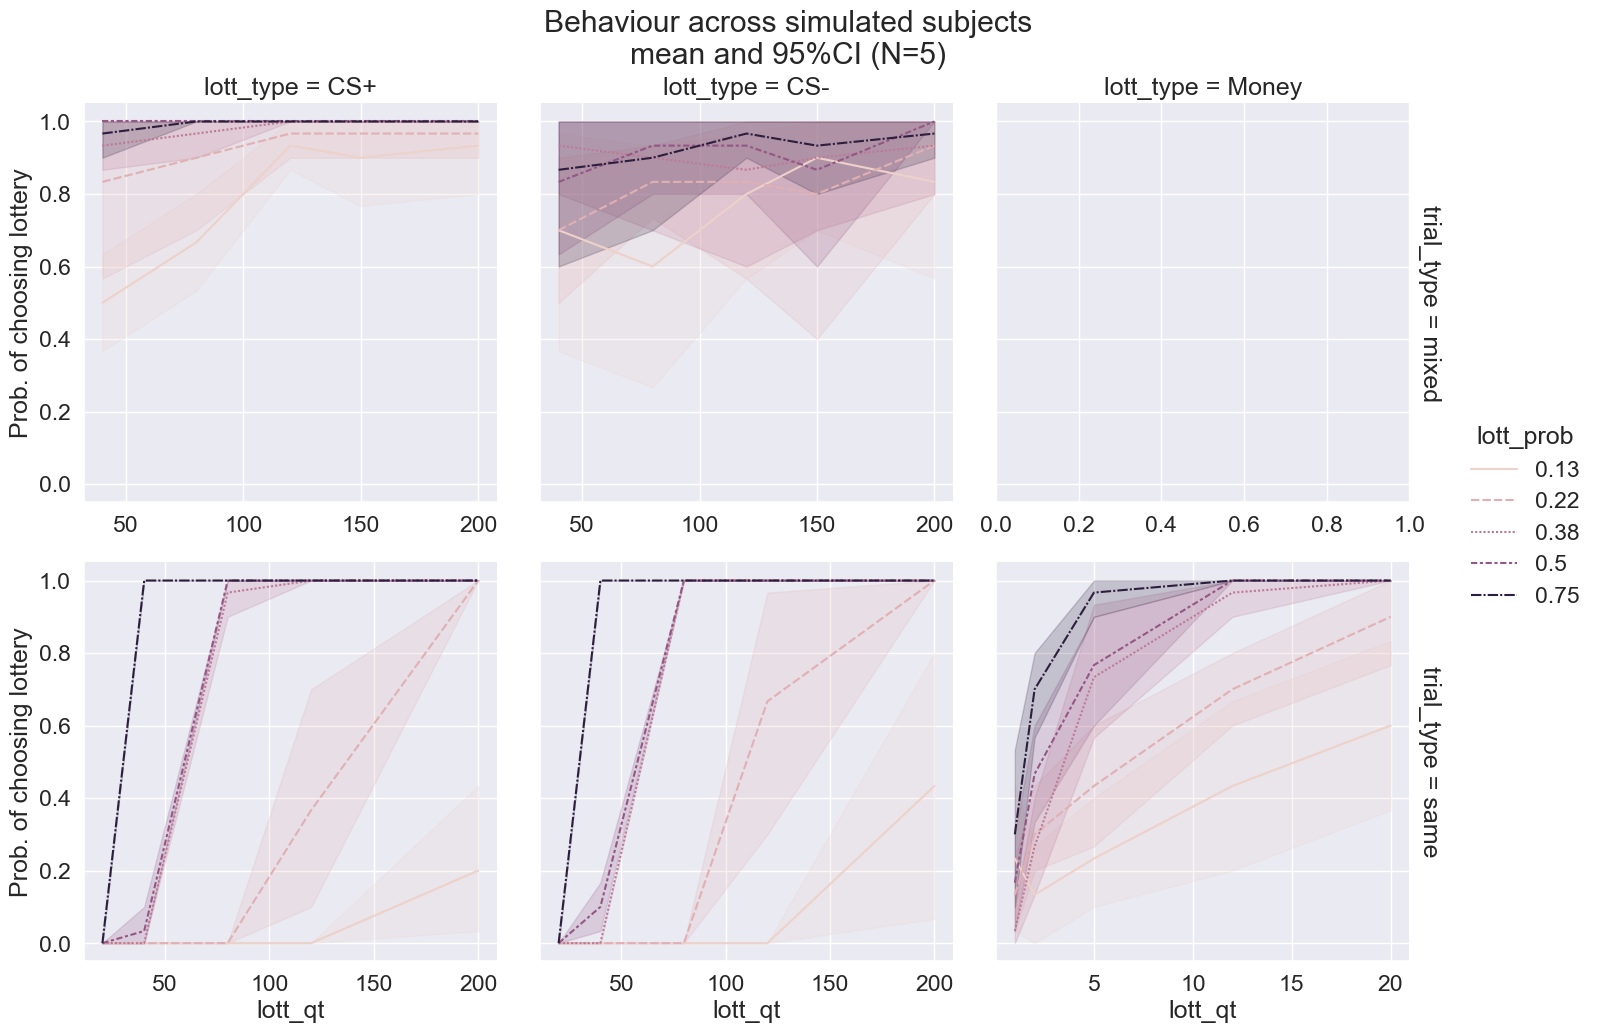

In [123]:
# INPUTS
allTrials_df = allTrials_df.copy()
N_subs = 5
x0 = x0_6params
#                         (mean, sd)
mean_std_st_money_alpha = (0.7, 0.1)
mean_std_st_cPlus_alpha = (0.8, 0.1)
mean_std_st_cMinus_alpha = (0.8, 0.1)
mean_std_st_money_beta = (1.8, 0.3)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = mean_std_st_money_beta
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.2, 0.05)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

plot_behaviour = True
output = 'long_flags'

(st_pars, mt_pars, 
 st_estPars, mt_estPars, 
 st_hessians, mt_hessians, 
 st_iterParams_df, mt_iterParams_df, 
 st_flags, mt_flags) = sim.simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                    mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                    mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                    mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                    mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                    plot_behaviour = True, startFromBehaviour = True,
                                    output = 'long_flags')

### Pack same type trials results and plot parameters

In [124]:
st_success_df = pd.DataFrame(st_flags, columns = ['model fit'])
st_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'beta']
else:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ ST beta', 'CS- ST beta']


st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'n_sub'
st_params_df = st_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')


st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df.index.name = 'n_sub'
st_estParams_df = st_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

st_po_df = st_params_df.merge(st_estParams_df, on= ['n_sub','parameter'])
st_po_df = st_po_df.merge(st_success_df.reset_index(),on='n_sub')
st_po_df

n_sub    parameter  Observed value  Predicted value  \
0       0  Money alpha        0.889706         0.885252   
1       0    CS+ alpha        0.840448         0.832390   
2       0    CS- alpha        0.822097         0.842803   
3       0         beta        1.924436         2.882112   
4       1  Money alpha        0.636696         0.626923   
5       1    CS+ alpha        0.844085         0.842019   
6       1    CS- alpha        0.948743         0.948629   
7       1         beta        2.238898         2.618214   
8       2  Money alpha        0.747488         0.690682   
9       2    CS+ alpha        0.796748         0.815260   
10      2    CS- alpha        0.809829         0.780602   
11      2         beta        2.129475         2.768742   
12      3  Money alpha        0.851581         0.910385   
13      3    CS+ alpha        0.909993         0.897827   
14      3    CS- alpha        0.873419         0.883376   
15      3         beta        2.197311         2.007806   
16      4  Money alpha        0.712639         0.740448   
17      4    CS+ alpha        0.800232         0.774875   
18      4    CS- alpha        0.908110         0.902916   
19      4         beta        1.412372         1.717345   

                                            model fit  
0               Optimization terminated successfully.  
1               Optimization terminated successfully.  
2               Optimization terminated successfully.  
3               Optimization terminated successfully.  
4   Desired error not necessarily achieved due to ...  
5   Desired error not necessarily achieved due to ...  
6   Desired error not necessarily achieved due to ...  
7   Desired error not necessarily achieved due to ...  
8               Optimization terminated successfully.  
9               Optimization terminated successfully.  
10              Optimization terminated successfully.  
11              Optimization terminated successfully.  
12              Optimization terminated successfully.  
13              Optimization terminated successfully.  
14              Optimization terminated successfully.  
15              Optimization terminated successfully.  
16              Optimization terminated successfully.  
17              Optimization terminated successfully.  
18              Optimization terminated successfully.  
19              Optimization terminated successfully.

In [125]:
print(st_po_df['model fit'].unique())
st_pars_minMax = st_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(st_params_colNames)
st_pars_minMax

['Optimization terminated successfully.'
 'Desired error not necessarily achieved due to precision loss.']


min       max
parameter                      
Money alpha  0.636696  0.889706
CS+ alpha    0.796748  0.909993
CS- alpha    0.809829  0.948743
beta         1.412372  2.238898

In [126]:
col_wrap = 3
fig = px.scatter(st_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':st_params_colNames,
                                  'model fit':sorted(list(st_po_df['model fit'].unique()), reverse=True) },
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (same type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )


fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, x1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       y0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, y1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[0,0], x1=st_pars_minMax.iloc[0,1], 
                       y0=st_pars_minMax.iloc[0,0], y1=st_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, x1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       y0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, y1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=2,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, x1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       y0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, y1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )


if x0 != x0_6params:
    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, x1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       y0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, y1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=0,
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )

    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, x1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       y0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, y1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=2,
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed same type parameters.html")

### Pack mixed type trials results and plot parameters

In [127]:
mt_success_df = pd.DataFrame(mt_flags, columns = ['model fit'])
mt_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    mt_params_colNames = ['CS+ sFactor', 'CS- sFactor',]
else:
    mt_params_colNames = ['CS+ MT beta', 'CS- MT beta', 
                          'CS+ sFactor', 'CS- sFactor',]


mt_params_df = pd.DataFrame(mt_pars).T
mt_params_df.columns= mt_params_colNames
mt_params_df.index.name = 'n_sub'
mt_params_df = mt_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')


mt_estParams_df = pd.DataFrame(mt_estPars).T
mt_estParams_df.columns= mt_params_colNames
mt_estParams_df.index.name = 'n_sub'
mt_estParams_df = mt_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

mt_po_df = mt_params_df.merge(mt_estParams_df, on= ['n_sub','parameter'])
mt_po_df = mt_po_df.merge(mt_success_df.reset_index(),on='n_sub')
mt_po_df

n_sub    parameter  Observed value  Predicted value  \
0      0  CS+ sFactor        0.144472         0.109100   
1      0  CS- sFactor        0.161293         0.094761   
2      1  CS+ sFactor        0.106746         0.085858   
3      1  CS- sFactor        0.208966         1.805847   
4      2  CS+ sFactor        0.235434         0.214872   
5      2  CS- sFactor        0.014216         0.020928   
6      3  CS+ sFactor        0.192862         0.174242   
7      3  CS- sFactor        0.146366         0.172153   
8      4  CS+ sFactor        0.276461         0.351020   
9      4  CS- sFactor        0.190597         0.161691   

                                           model fit  
0  Desired error not necessarily achieved due to ...  
1  Desired error not necessarily achieved due to ...  
2  Desired error not necessarily achieved due to ...  
3  Desired error not necessarily achieved due to ...  
4              Optimization terminated successfully.  
5              Optimization terminated successfully.  
6              Optimization terminated successfully.  
7              Optimization terminated successfully.  
8              Optimization terminated successfully.  
9              Optimization terminated successfully.

In [128]:
print(mt_po_df['model fit'].unique())
mt_pars_minMax = mt_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(mt_params_colNames)
mt_pars_minMax

['Desired error not necessarily achieved due to precision loss.'
 'Optimization terminated successfully.']


min       max
parameter                      
CS+ sFactor  0.106746  0.276461
CS- sFactor  0.014216  0.208966

In [129]:
col_wrap = 2
fig = px.scatter(mt_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':mt_params_colNames,
                                  'model fit': sorted(list(mt_po_df['model fit'].unique()), reverse=True)},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (mixed type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, x1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       y0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, y1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, x1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       y0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, y1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )


    
fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed mixed type parameters.html")

## Strat from fixed initial conditions

In [130]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


### Initialization Parameters

In [131]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

### Fit

Running 10 optimizers per subject with random initial estimates


100%|██████████| 5/5 [01:06<00:00, 13.23s/it]


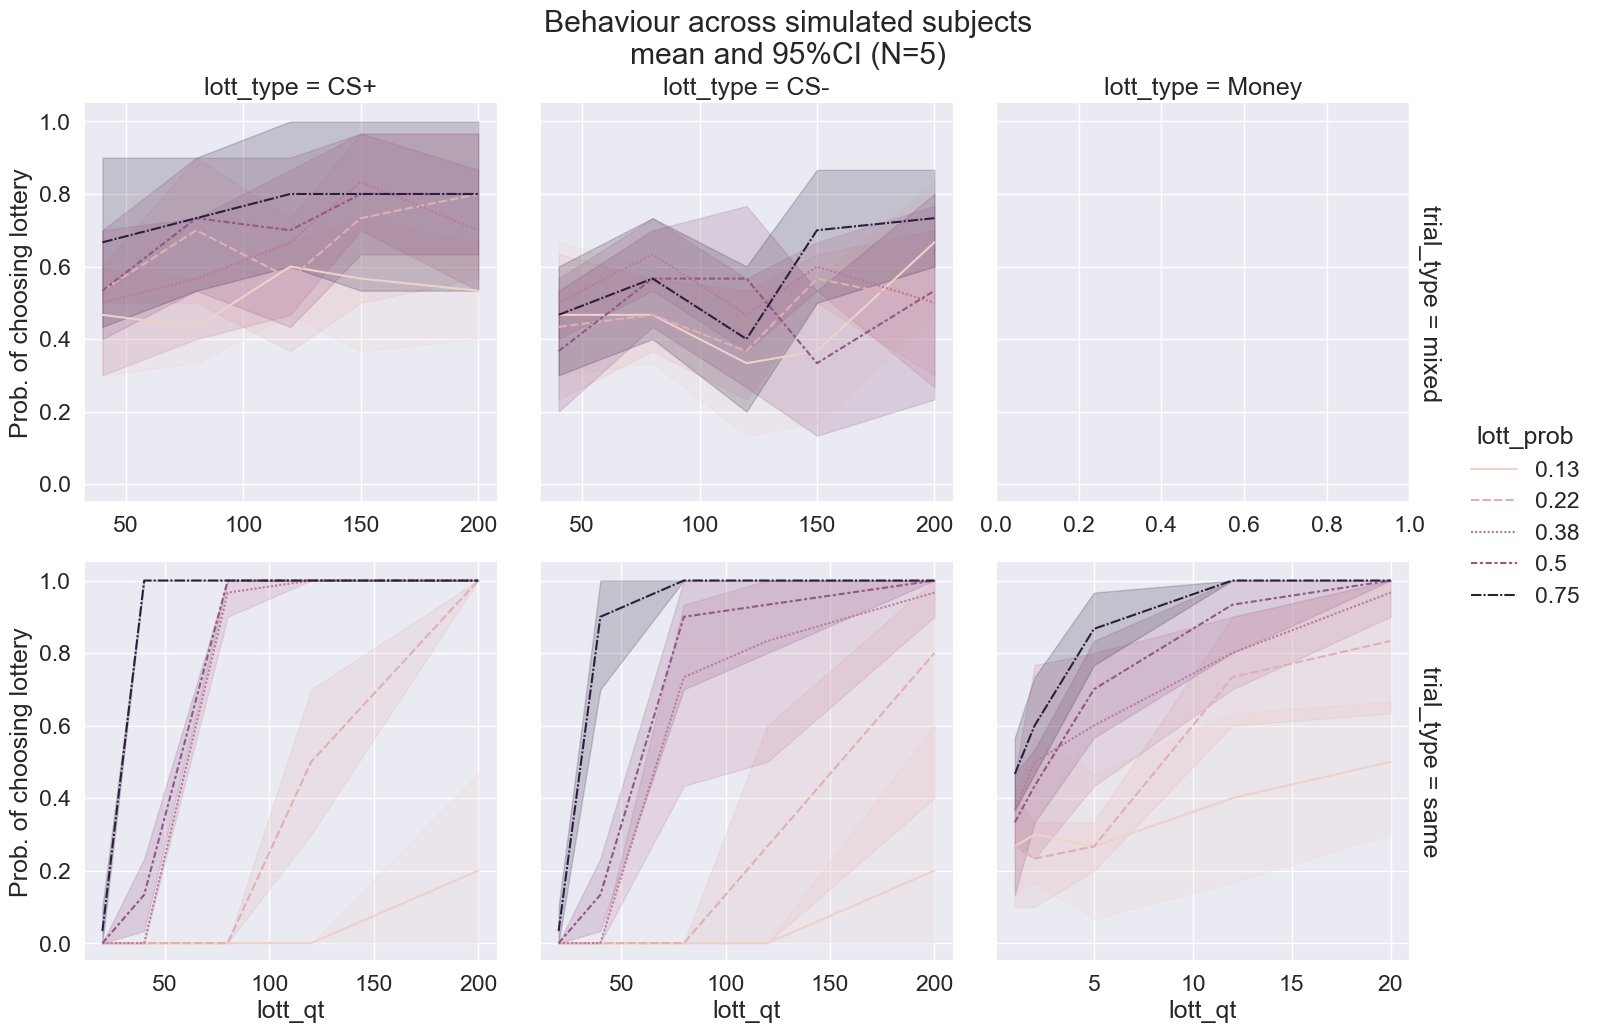

In [255]:
# INPUTS
allTrials_df = allTrials_df.copy()
N_subs = 5
x0 = x0_6params
#                         (mean, sd)
mean_std_st_money_alpha = (0.7, 0.1)
mean_std_st_cPlus_alpha = (0.8, 0.1)
mean_std_st_cMinus_alpha = (0.8, 0.1)
mean_std_st_money_beta = (1.8, 0.3)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = mean_std_st_money_beta
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.02, 0.05)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

startFromBehaviour = False
plot_behaviour = True
output = 'long_flags'

(st_pars, mt_pars, 
 st_estPars, mt_estPars, 
 st_hessians, mt_hessians, 
 st_iterParams_df, mt_iterParams_df, 
 st_flags, mt_flags) = sim.simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                    mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                    mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                    mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                    mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                    plot_behaviour = plot_behaviour, startFromBehaviour = startFromBehaviour,
                                    output = output)

# Multiple optimizers

In [2]:
import warnings

In [3]:
import numpy as np
import random 
import pandas as pd
from scipy.optimize import minimize


st_id = 'same'
mt_id = 'mixed'
money_id = 'Money'
cPlus_id = 'CS+'
cMinus_id = 'CS-'

optimize_cols = ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']

def _get_choices(df, columns = ['ref_prob', 'ref_qt', 'ref_alpha', 
           'lott_prob', 'lott_qt', 'lott_alpha', 
           'beta', 'sFactor']):
    
    numeric_df = df.apply(pd.to_numeric, errors='ignore', downcast='float').select_dtypes('float', 'int')

    arr = numeric_df.values
    arr_labels = numeric_df.columns

    ref_prob_arr = arr[:, arr_labels == columns[0]]
    ref_qt_arr = arr[:, arr_labels == columns[1]]
    ref_alpha_arr = arr[:, arr_labels == columns[2]]

    lott_prob_arr = arr[:, arr_labels == columns[3]]
    lott_qt_arr = arr[:, arr_labels == columns[4]]
    lott_alpha_arr = arr[:, arr_labels == columns[5]]

    beta_arr = arr[:, arr_labels == columns[6]]
    sFactor_arr = arr[:, arr_labels == columns[7]]

    euR = necon._calculate_EU(ref_prob_arr, ref_qt_arr, ref_alpha_arr)
    euL = necon._calculate_EU(lott_prob_arr, lott_qt_arr, lott_alpha_arr)
    pL = necon._calculate_pL(euL, euR, beta_arr, sFactor_arr)
    choices = np.random.uniform(size=euR.shape) < pL
    return choices

def _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                 lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                 beta_arr, sFactor_arr, 
                 choice_arr):
    
    euR = ref_prob_arr*ref_qt_arr**ref_alpha_arr 
    euL = lott_prob_arr*lott_qt_arr**lott_alpha_arr

    # Compute things once, sign flip to possibly save one operation
    y = beta_arr*(euR - euL*sFactor_arr)
    chose_ref = choice_arr==False

    # values to be summed up, already negative:
    nll_v = np.log(1 + np.exp(y))
    nll_v[chose_ref] = nll_v[chose_ref] - y[chose_ref]

    return np.sum(nll_v)


def _get_st_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 4:
       # Three alphas, one beta 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[lott_type_arr == money_id] = st_money_beta
       beta_arr[lott_type_arr == cPlus_id] = st_cPlus_beta
       beta_arr[lott_type_arr == cMinus_id] = st_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood


def _get_mt_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)


    # Unpack params
    if len(params) == 2:
       # two scaling factors
       (cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 4:
       # Two betas and two scaling factors
       (mt_cPlus_beta, mt_cMinus_beta,
        cPlus_sFactor, cMinus_sFactor) = params

       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

       beta_arr[lott_type_arr == cMinus_id] = mt_cPlus_beta
       beta_arr[lott_type_arr == money_id] = mt_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood

def stepwise_estimate_MultiOpt(args, x0, N_optimizers):

    def _get_iter_params(xk):
        iter_params_list.append(xk.tolist())
    
    df = args
    st_mask = df[optimize_cols[0]] == 'same'
    mt_mask = df[optimize_cols[0]] == 'mixed'

    cPlus_mask = df[optimize_cols[4]] == 'CS+'
    cMinus_mask = df[optimize_cols[4]] == 'CS-'

    # Unpack initialization parameters
    if len(x0) == 6:
        (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta,
            cPlus_sFactor, cMinus_sFactor) = x0
        st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                    beta)
        mt_params = (cPlus_sFactor, cMinus_sFactor)
        st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                                'beta']
        mt_params_colNames = ['CS+ sFactor', 'CS- sFactor']
    elif len(x0) == 10:
        (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta,
            mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor) = x0
        st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                    st_money_beta, st_cPlus_beta, st_cMinus_beta)
        mt_params = (mt_cPlus_beta, mt_cMinus_beta,
                    cPlus_sFactor, cMinus_sFactor)
        st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                                'Money beta', 'CS+ st beta', 'CS- st beta', ]
        mt_params_colNames = ['CS+ mt beta', 'CS- mt beta',
                                'CS+ sFactor', 'CS- sFactor']

    for n_opt in range(N_optimizers):
        x0_st_params = tuple([random.uniform(*pars) for pars in st_params])
        # Estimate parameters from Same type trials
        iter_params_list = []
        res_st_ = minimize(_get_st_nll, x0_st_params, args=df.loc[st_mask,:],
                            callback=_get_iter_params)
        if n_opt == 0:
            res_st = res_st_
        else:
            if res_st_.fun < res_st.fun:
                res_st = res_st_

    st_iterParams_df = pd.DataFrame(iter_params_list, columns=st_params_colNames)

    # map same type estimation results to required fields
    df.loc[mt_mask, optimize_cols[8]] = res_st.x[0]                 # Money alpha
    df.loc[mt_mask & cPlus_mask, optimize_cols[9]] = res_st.x[1]    # CS+ alpha
    df.loc[mt_mask & cMinus_mask, optimize_cols[9]] = res_st.x[2]   # CS- alpha
    if len(x0) == 6:
        df.loc[mt_mask, optimize_cols[10]] = res_st.x[3]              # beta
    for n_opt in range(N_optimizers):
        x0_mt_params = tuple([random.uniform(*pars) for pars in mt_params])
        # Estimate parameters from mixed type trials
        iter_params_list = []
        res_mt_ = minimize(_get_mt_nll, x0_mt_params, args=df.loc[mt_mask,:],
                            callback=_get_iter_params)
        if n_opt == 0:
            res_mt = res_mt_
        else:
            if res_mt_.fun < res_st.fun:
                res_mt = res_mt_
    mt_iterParams_df = pd.DataFrame(iter_params_list, columns=mt_params_colNames)

    return res_st, res_mt, st_iterParams_df, mt_iterParams_df

In [4]:
def _simNsubsfit_MultiOpt(allTrials_df, N_subs, x0, 
                                 st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                                 st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                                 mt_cPlus_beta_arr, mt_cMinus_beta_arr, 
                                 cPlus_sFactor_arr, cMinus_sFactor_arr,
                                 N_optimizers = 50,
                                 plot_behaviour = True, output = 'long_flags'):

    # ---------------------------------------------------------------------------
    # Prelocate mememory and/or create variables for outputs
    
    if len(x0) == 6:
        st_param_size = 4
        mt_param_size = 2
    elif len(x0) == 10:
        st_param_size = 6
        mt_param_size = 4
    
    st_estPars = np.zeros((st_param_size, N_subs))
    mt_estPars = np.zeros((mt_param_size, N_subs))
    if 'flags' in output:
        st_flags = []
        mt_flags = []
    if 'short' not in output:
        st_hessians = np.zeros((st_param_size, st_param_size, N_subs))
        mt_hessians = np.zeros((mt_param_size, mt_param_size, N_subs))
    if 'long' in output:
        st_iterParams_df = pd.DataFrame()
        mt_iterParams_df = pd.DataFrame()
    
    if plot_behaviour:
        subject_choiceCount_df = pd.DataFrame()
    
    for i in tqdm(range(N_subs)):
        # Get parameters per participant
        # ¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
        st_money_alpha = st_money_alpha_arr[i]
        st_cPlus_alpha = st_cPlus_alpha_arr[i]
        st_cMinus_alpha = st_cMinus_alpha_arr[i]
        st_money_beta = st_money_beta_arr[i]
        st_cPlus_beta = st_cPlus_beta_arr[i]
        st_cMinus_beta = st_cMinus_beta_arr[i]
        mt_cPlus_beta = mt_cPlus_beta_arr[i]
        mt_cMinus_beta = mt_cMinus_beta_arr[i]
        cPlus_sFactor = cPlus_sFactor_arr[i]
        cMinus_sFactor = cMinus_sFactor_arr[i]
        
        # simulate subject behaviour
        # ¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
        subjectTrials_df = sim._pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, st_money_beta, 
                                              st_cPlus_beta, st_cMinus_beta, mt_cPlus_beta, mt_cMinus_beta, 
                                              cPlus_sFactor, cMinus_sFactor, 
                                              allTrials_df)

        subjectTrials_df.insert(7, optimize_cols[7], _get_choices(subjectTrials_df))

        # Pack initial estimates and fit model
        # ¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
        res_st, res_mt, _st_iterParams_df, _mt_iterParams_df = stepwise_estimate_MultiOpt(subjectTrials_df, x0, N_optimizers)
        
        # prepare plot
        # ¨¨¨¨¨¨¨¨¨¨¨¨
        if plot_behaviour:
            # Compute Probability of chossing lottery per subject
            _subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                            list(subjectTrials_df[beahviour_cols].columns[:-1])
                            ).apply(
                        lambda df: necon.get_probLottery(df)), 
                        columns = [_v_.probLotteryChoice_colName]).reset_index()
            _subject_choiceCount_df['n_sub'] = i

            subject_choiceCount_df = pd.concat([subject_choiceCount_df, _subject_choiceCount_df], axis = 0)

        # Prepare OUTPUTS
        # ¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
        st_estPars[:, i] = res_st.x
        mt_estPars[:, i] = res_mt.x

        if 'flags' in output:
            st_flags.append(res_st.message)
            mt_flags.append(res_mt.message)

        if 'short' not in output:
            st_hessians[:, :, i] = res_st.hess_inv
            mt_hessians[:, :, i] = res_mt.hess_inv

        if 'long' in output:
            _st_iterParams_df = _st_iterParams_df.reset_index().rename(columns={'index':'iter'},)
            _st_iterParams_df['n_sub'] = i
            
            _mt_iterParams_df = _mt_iterParams_df.reset_index().rename(columns={'index':'iter'},)
            _mt_iterParams_df['n_sub'] = i

            st_iterParams_df = pd.concat([st_iterParams_df, _st_iterParams_df], axis = 0)
            mt_iterParams_df = pd.concat([mt_iterParams_df, _mt_iterParams_df], axis = 0)
    # ---------------------------------------------------------------------------
    # Pack outputs
    if output == 'short':
        out_vars = (st_estPars, mt_estPars)
    elif output == 'short_flags':
        out_vars = (st_estPars, mt_estPars, st_flags, mt_flags)
    elif output == 'medium':
        out_vars = (st_estPars, mt_estPars, st_hessians, mt_hessians)
    elif output == 'medium_flags':
        out_vars = (st_estPars, mt_estPars, st_hessians, mt_hessians, st_flags, mt_flags)
    elif output == 'long':
        out_vars = (st_estPars, mt_estPars, st_hessians, mt_hessians, st_iterParams_df, mt_iterParams_df)
    elif output == 'long_flags':
        out_vars = (st_estPars, mt_estPars, st_hessians, mt_hessians, st_iterParams_df, mt_iterParams_df, st_flags, mt_flags)

    if plot_behaviour:
        out_vars += (subject_choiceCount_df,)
    return out_vars

def simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                 mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                 mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                 mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                 mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                 N_optimizers = 20,
                                 plot_behaviour = True, startFromBehaviour = False,
                                 output = 'long_flags'):

    # ---------------------------------------------------------------------------
    # Create array of parameters used for behaviour simulation

    st_money_alpha_arr = abs(np.random.normal(*mean_std_st_money_alpha, N_subs))
    st_cPlus_alpha_arr = abs(np.random.normal(*mean_std_st_cPlus_alpha, N_subs))
    st_cMinus_alpha_arr = abs(np.random.normal(*mean_std_st_cMinus_alpha, N_subs))
    st_money_beta_arr = abs(np.random.normal(*mean_std_st_money_beta, N_subs))

    cPlus_sFactor_arr = abs(np.random.normal(*mean_std_cPlus_sFactor, N_subs))
    cMinus_sFactor_arr = abs(np.random.normal(*mean_std_cMinus_sFactor, N_subs))

    if len(x0) == 6:
        #model_type = '3 alphas, 1 beta and 2 sFactors'
        st_cPlus_beta_arr = st_money_beta_arr
        st_cMinus_beta_arr = st_money_beta_arr
        mt_cPlus_beta_arr = st_money_beta_arr
        mt_cMinus_beta_arr = st_money_beta_arr
        
        # pack parameters
        st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                        st_money_beta_arr,] )
        mt_pars = np.stack([cPlus_sFactor_arr, cMinus_sFactor_arr])

    else:
        # model_type = '3 alphas, 5 beta and 2 sFactors'    
        st_cPlus_beta_arr = abs(np.random.normal(*mean_std_st_cPlus_beta, N_subs))
        st_cMinus_beta_arr = abs(np.random.normal(*mean_std_st_cMinus_beta, N_subs))
        mt_cPlus_beta_arr = abs(np.random.normal(*mean_std_mt_cPlus_beta, N_subs))
        mt_cMinus_beta_arr = abs(np.random.normal(*mean_std_mt_cMinus_beta, N_subs))
        # pack parameters
        st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                        st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                        ] )
        mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                            cPlus_sFactor_arr, cMinus_sFactor_arr])
    
    # ---------------------------------------------------------------------------
    # Start Loop
    warnings.filterwarnings("ignore")#, category=RuntimeWarning)       # Ignore Optimization Warnings

    try:
        len(x0[0])>1
        # Run multiple optimizers (minRange, maxRange, N_optimizers)
        print('Running {} optimizers per subject with random initial estimates'.format(N_optimizers))
        out_vars = _simNsubsfit_MultiOpt(allTrials_df, N_subs, x0, 
                                 st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                                 st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                                 mt_cPlus_beta_arr, mt_cMinus_beta_arr, 
                                 cPlus_sFactor_arr, cMinus_sFactor_arr,
                                 N_optimizers = N_optimizers,
                                 plot_behaviour = True, output = 'long_flags')
    except TypeError:
        if startFromBehaviour:
            x0_arr = np.concatenate([st_pars, mt_pars])
            print('Starting optimization from true parameters')
        else:
            print('Starting optimization with fixed values as initial estimates')
            x0_arr = np.repeat(np.expand_dims(np.array(x0), 1), N_subs, axis =1)

        # Fit model with one optimizer
        out_vars =sim._simNsubsfit_oneOptimizer(allTrials_df, N_subs, x0_arr, 
                                 st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                                 st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                                 mt_cPlus_beta_arr, mt_cMinus_beta_arr, 
                                 cPlus_sFactor_arr, cMinus_sFactor_arr,
                                 plot_behaviour = True, output = 'long_flags')
        
    out_vars = (st_pars, mt_pars, ) + out_vars
    
    # ---------------------------------------------------------------------------
    # Plot Behaviour if requested
    if plot_behaviour:
        subject_choiceCount_df = out_vars[-1]
        out_vars = out_vars[:-1]
        sns.set(font_scale=1.5)
        # CREATE FUNTION IN PLOTS FOR THIS!!
        # Throwing a depreciation warning that I want to filter
        g = sns.relplot(
            data=subject_choiceCount_df.reset_index(drop=True), x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
            col=beahviour_cols[-4], row = beahviour_cols[0],
            hue=beahviour_cols[-2], style=beahviour_cols[-2], kind="line",facet_kws={'sharex': False, 'margin_titles' : True},
        )
        g.fig.suptitle('Behaviour across simulated subjects\nmean and 95%CI (N={})'.format(N_subs), va='bottom');
    
    warnings.filterwarnings("always")#, category=RuntimeWarning)        # Turn Warnings back on
    
    # ---------------------------------------------------------------------------

    return out_vars

In [5]:
import tqdm as tqdm

## Initialization Parameters

In [6]:
alphaMoney0 = (0.1, 1.5)
alphaCplus0 = (0.1, 1.5)
alphaCminus0 = (0.1, 1.5)

st_betaMoney0 = (0.5, 15) # also used in model with only one beta
st_betaCplus0 = (0.5, 15)
st_betaCminus0 = (0.5, 15)
mt_betaCplus0 = (0.5, 15)
mt_betaCminus0 = (0.5, 15)

sFactorCplus0 = (0.01, 0.5)
sFactorCminus0= (0.01, 0.5)


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

## Fixed Task parameters

### Old pars

In [7]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


Running 20 optimizers per subject with random initial estimates
Starting optimization from true parameters


100%|██████████| 100/100 [03:21<00:00,  2.01s/it]


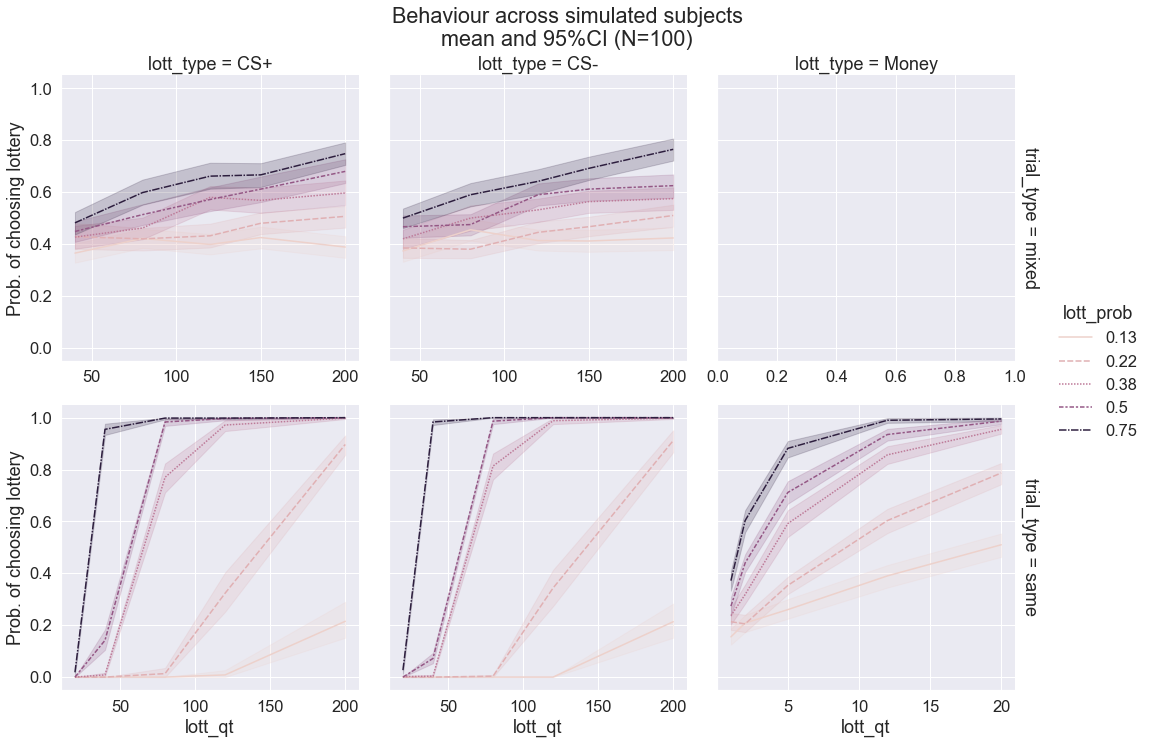

In [8]:
# INPUTS
allTrials_df = allTrials_df.copy()
N_subs = 100
x0 = x0_6params
#                         (mean, sd)
mean_std_st_money_alpha = (0.7, 0.1)
mean_std_st_cPlus_alpha = (0.8, 0.1)
mean_std_st_cMinus_alpha = (0.8, 0.1)
mean_std_st_money_beta = (1.8, 0.3)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = (10, 0.3)
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.02, 0.005)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

plot_behaviour = True
output = 'long_flags'

(st_pars, mt_pars, 
 st_estPars, mt_estPars, 
 st_hessians, mt_hessians, 
 st_iterParams_df, mt_iterParams_df, 
 st_flags, mt_flags) = simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                    mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                    mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                    mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                    mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                    plot_behaviour = True, startFromBehaviour = True,
                                    N_optimizers=20, output = 'long_flags')

#### Pack same type trials results and plot parameters

In [9]:
st_success_df = pd.DataFrame(st_flags, columns = ['model fit'])
st_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'beta']
else:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ ST beta', 'CS- ST beta']


st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'n_sub'
st_params_df = st_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')

# st_params_df
st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df.index.name = 'n_sub'
# st_estParams_df

st_estParams_df = st_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

st_po_df = st_params_df.merge(st_estParams_df, on= ['n_sub','parameter'])
st_po_df = st_po_df.merge(st_success_df.reset_index(),on='n_sub')
# st_po_df

print(sorted(list(st_po_df['model fit'].unique()), reverse=True))
st_pars_minMax = st_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(st_params_colNames)
# st_pars_minMax


col_wrap = 3
fig = px.scatter(st_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':st_params_colNames,
                                  'model fit':sorted(list(st_po_df['model fit'].unique()), reverse=True) },
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (same type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )


fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, x1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       y0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, y1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[0,0], x1=st_pars_minMax.iloc[0,1], 
                       y0=st_pars_minMax.iloc[0,0], y1=st_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, x1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       y0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, y1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=2,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, x1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       y0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, y1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )


if x0 != x0_6params:
    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, x1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       y0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, y1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=0,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, x1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       y0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, y1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=2,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed same type parameters.html")


['Optimization terminated successfully.', 'Desired error not necessarily achieved due to precision loss.']


#### Pack mixed type trials results and plot parameters

In [10]:
mt_success_df = pd.DataFrame(mt_flags, columns = ['model fit'])
mt_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    mt_params_colNames = ['CS+ sFactor', 'CS- sFactor',]
else:
    mt_params_colNames = ['CS+ MT beta', 'CS- MT beta', 
                          'CS+ sFactor', 'CS- sFactor',]


mt_params_df = pd.DataFrame(mt_pars).T
mt_params_df.columns= mt_params_colNames
mt_params_df.index.name = 'n_sub'
mt_params_df = mt_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')


mt_estParams_df = pd.DataFrame(mt_estPars).T
mt_estParams_df.columns= mt_params_colNames
mt_estParams_df.index.name = 'n_sub'
mt_estParams_df = mt_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

mt_po_df = mt_params_df.merge(mt_estParams_df, on= ['n_sub','parameter'])
mt_po_df = mt_po_df.merge(mt_success_df.reset_index(),on='n_sub')
# mt_po_df
print(mt_po_df['model fit'].unique())
mt_pars_minMax = mt_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(mt_params_colNames)
# mt_pars_minMax

col_wrap = 2
fig = px.scatter(mt_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':mt_params_colNames,
                                  'model fit': sorted(list(mt_po_df['model fit'].unique()), reverse=True)},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (mixed type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, x1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       y0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, y1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, x1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       y0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, y1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )


    
fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed mixed type parameters.html")

['Optimization terminated successfully.'
 'Desired error not necessarily achieved due to precision loss.']


### New pars

In [11]:
uniqueLott_Nreps= 7      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                                        # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]              # Lottery option

# Same-type task variables
st_money_refQs = [2]                                  # Euros
st_money_lottQs = [2, 5, 12, 20]                      # Euros

st_cPlus_refQs = [20]                                 # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120]                   # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                       # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [20, 40, 80, 120]                   # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs                    # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     420
mixed    280
Name: trial_type, dtype: int64


Running 20 optimizers per subject with random initial estimates
Starting optimization from true parameters


100%|██████████| 100/100 [02:52<00:00,  1.72s/it]


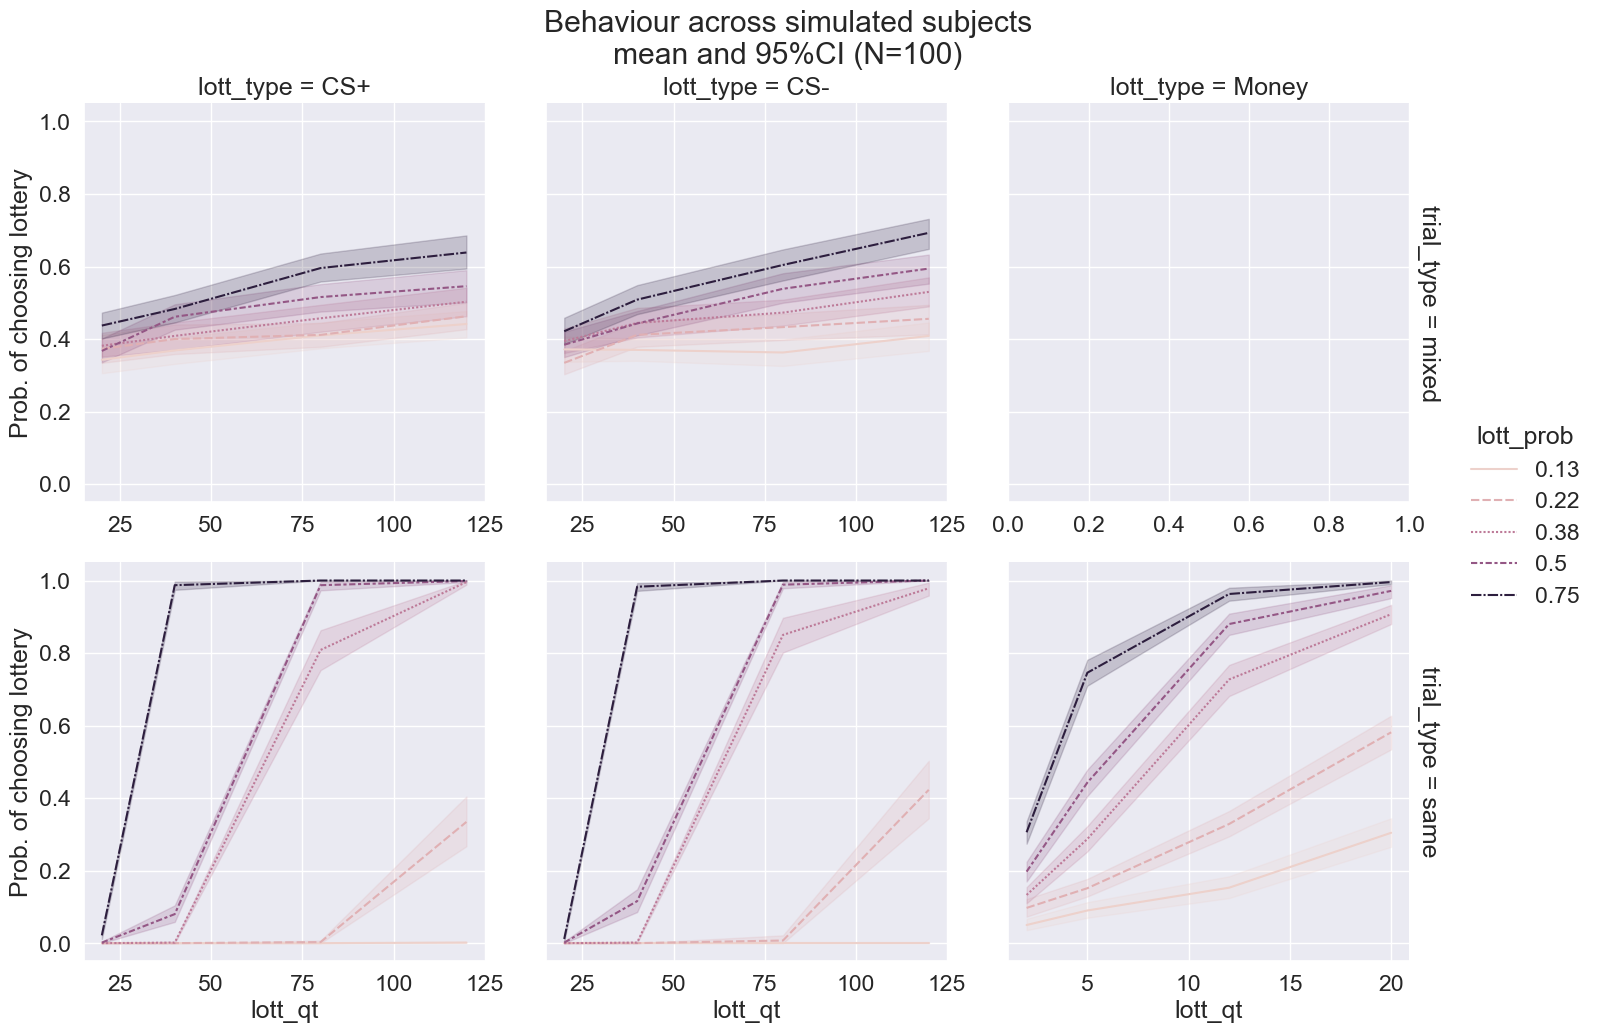

In [12]:
# INPUTS
allTrials_df = allTrials_df.copy()
N_subs = 100
x0 = x0_6params
#                         (mean, sd)
mean_std_st_money_alpha = (0.7, 0.1)
mean_std_st_cPlus_alpha = (0.8, 0.1)
mean_std_st_cMinus_alpha = (0.8, 0.1)
mean_std_st_money_beta = (1.8, 0.3)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = (10, 0.3)
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.02, 0.005)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

plot_behaviour = True
output = 'long_flags'

(st_pars, mt_pars, 
 st_estPars, mt_estPars, 
 st_hessians, mt_hessians, 
 st_iterParams_df, mt_iterParams_df, 
 st_flags, mt_flags) = simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                    mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                    mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                    mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                    mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                    plot_behaviour = True, startFromBehaviour = True,
                                    N_optimizers=20, output = 'long_flags')

In [21]:
st_hessians.shape

(4, 4, 100)

In [37]:
print('Same type parameters')
print(20*'-')
print('cohort mean              {}'.format(np.round(st_estPars.mean(axis = 1), 3)))
print('cohort sd                {}'.format(np.round(st_estPars.std(axis = 1), 3)))
print('mean 95CI of estimates   {}'.format(np.round(1.96*np.sqrt(np.diag(st_hessians.mean(axis = 2))),3)))
print(20 * '=')
print('\nMixed type parameters')
print(20*'-')
print('cohort mean              {}'.format(np.round(mt_estPars.mean(axis = 1), 3)))
print('cohort sd                {}'.format(np.round(mt_estPars.std(axis = 1), 3)))
print('mean 95CI of estimates   {}'.format(np.round(1.96*np.sqrt(np.diag(mt_hessians.mean(axis = 2))),3)))

Same type parameters
--------------------
cohort mean              [0.693 0.796 0.815 1.977]
cohort sd                [0.118 0.094 0.103 0.383]
mean 95CI of estimates   [0.095 0.054 0.054 0.584]

Mixed type parameters
--------------------
cohort mean              [0.02  0.022]
cohort sd                [0.011 0.013]
mean 95CI of estimates   [0.021 0.196]


#### Pack same type trials results and plot parameters

In [31]:
st_success_df = pd.DataFrame(st_flags, columns = ['model fit'])
st_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'beta']
else:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ ST beta', 'CS- ST beta']


st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'n_sub'
st_params_df = st_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')

# st_params_df
st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df.index.name = 'n_sub'
# st_estParams_df

st_estParams_df = st_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

st_po_df = st_params_df.merge(st_estParams_df, on= ['n_sub','parameter'])
st_po_df = st_po_df.merge(st_success_df.reset_index(),on='n_sub')
# st_po_df

print(sorted(list(st_po_df['model fit'].unique()), reverse=True))
st_pars_minMax = st_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(st_params_colNames)
# st_pars_minMax

col_wrap = 3
fig = px.scatter(st_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':st_params_colNames,
                                  'model fit':sorted(list(st_po_df['model fit'].unique()), reverse=True) },
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (same type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )


fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, x1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       y0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, y1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[0,0], x1=st_pars_minMax.iloc[0,1], 
                       y0=st_pars_minMax.iloc[0,0], y1=st_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, x1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       y0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, y1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=2,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, x1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       y0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, y1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )


if x0 != x0_6params:
    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, x1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       y0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, y1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=0,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, x1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       y0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, y1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=2,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed same type parameters.html")


['Optimization terminated successfully.', 'Desired error not necessarily achieved due to precision loss.']


#### Pack mixed type trials results and plot parameters

In [33]:
mt_success_df = pd.DataFrame(mt_flags, columns = ['model fit'])
mt_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    mt_params_colNames = ['CS+ sFactor', 'CS- sFactor',]
else:
    mt_params_colNames = ['CS+ MT beta', 'CS- MT beta', 
                          'CS+ sFactor', 'CS- sFactor',]


mt_params_df = pd.DataFrame(mt_pars).T
mt_params_df.columns= mt_params_colNames
mt_params_df.index.name = 'n_sub'
mt_params_df = mt_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')


mt_estParams_df = pd.DataFrame(mt_estPars).T
mt_estParams_df.columns= mt_params_colNames
mt_estParams_df.index.name = 'n_sub'
mt_estParams_df = mt_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

mt_po_df = mt_params_df.merge(mt_estParams_df, on= ['n_sub','parameter'])
mt_po_df = mt_po_df.merge(mt_success_df.reset_index(),on='n_sub')
# mt_po_df
print(mt_po_df['model fit'].unique())
mt_pars_minMax = mt_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(mt_params_colNames)
# mt_pars_minMax

col_wrap = 2
fig = px.scatter(mt_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':mt_params_colNames,
                                  'model fit': sorted(list(mt_po_df['model fit'].unique()), reverse=True)},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (mixed type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, x1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       y0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, y1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, x1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       y0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, y1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )


    
fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed mixed type parameters.html")

['Optimization terminated successfully.'
 'Desired error not necessarily achieved due to precision loss.']


## Random parameters

### 20 samples in quantity, no rep

In [38]:
uniqueLott_Nreps = 1      # Unique Lottery Repititions  
n_samples = 20

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [2]                               # Euros
st_money_lottQs_arr = np.round(np.linspace(2, 20, n_samples), 0)
st_money_lottQs = list(st_money_lottQs_arr)

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs_arr = np.round(np.linspace(20, 120, n_samples)/10, 0)*10
st_cPlus_lottQs = list(st_cPlus_lottQs_arr)      # mL of CS+ yogurt 

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]
mt_cPlus_lottQs_arr = np.round(np.linspace(20, 120, n_samples)/10, 0)*10
mt_cPlus_lottQs = list(mt_cPlus_lottQs_arr)      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))
allTrials_df.head()

Trials per type:
same     300
mixed    200
Name: trial_type, dtype: int64


trial_type ref_type  ref_qt  ref_prob lott_type  lott_qt  lott_prob
0       same    Money     2.0         1     Money      2.0       0.13
1       same    Money     2.0         1     Money      2.0       0.22
2       same    Money     2.0         1     Money      2.0       0.38
3       same    Money     2.0         1     Money      2.0       0.50
4       same    Money     2.0         1     Money      2.0       0.75

Running 20 optimizers per subject with random initial estimates
Starting optimization from true parameters


100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


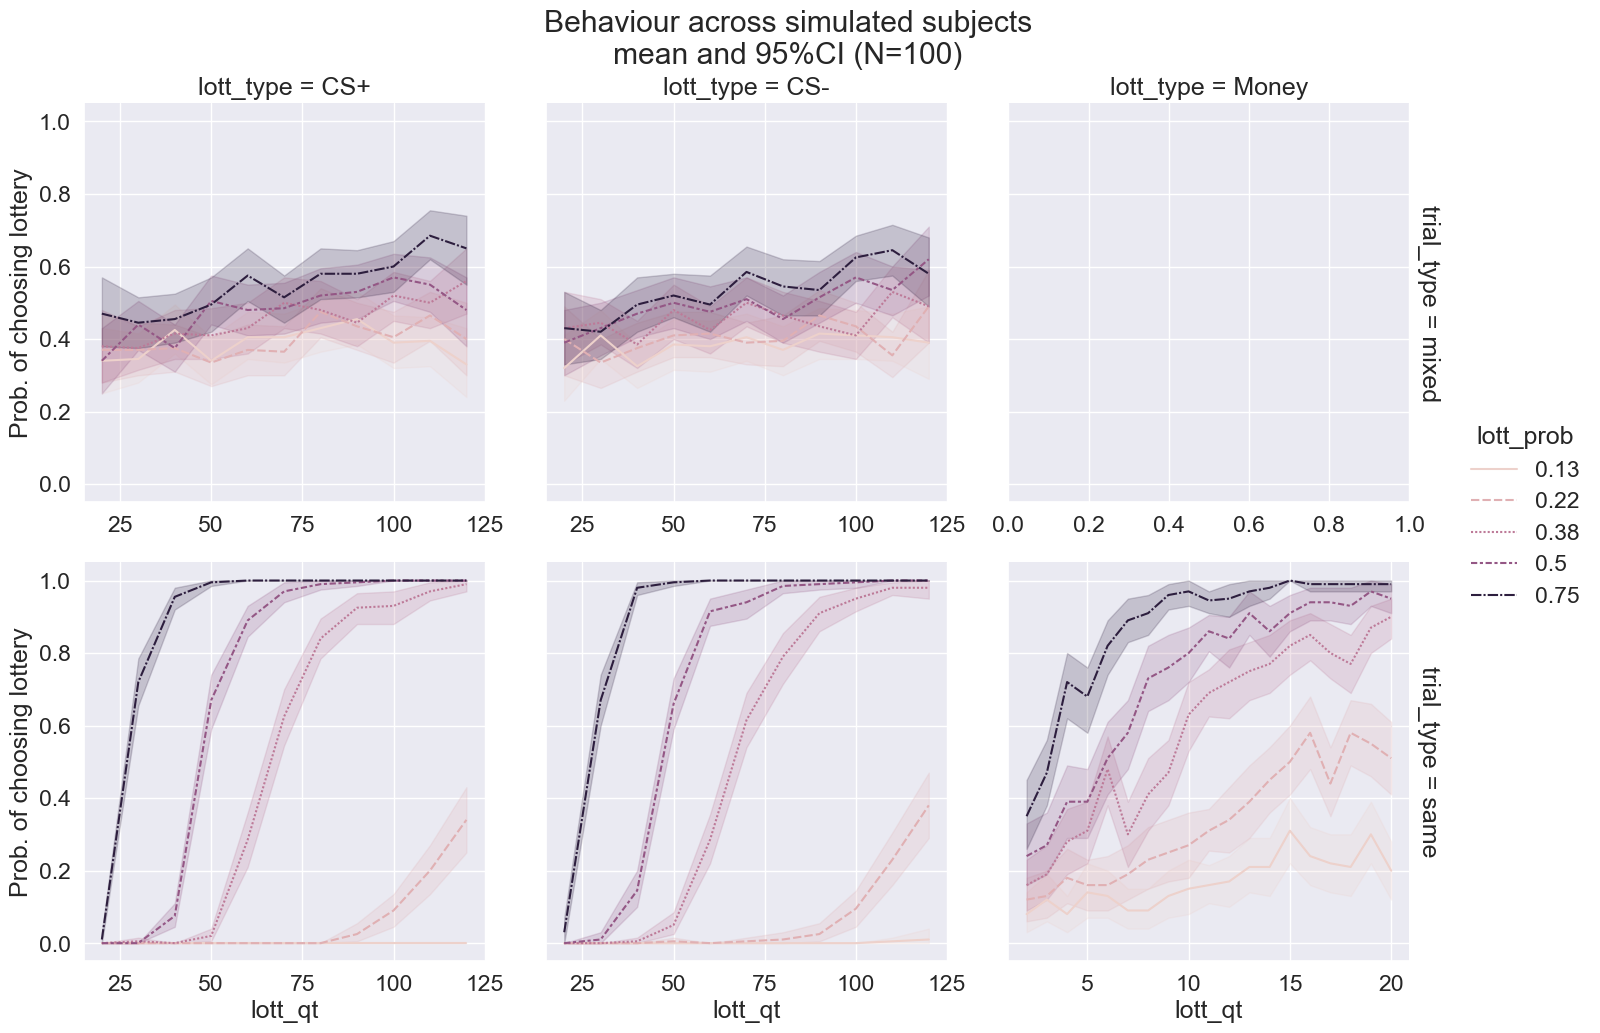

In [39]:
# INPUTS
allTrials_df = allTrials_df.copy()
N_subs = 100
x0 = x0_6params
#                         (mean, sd)
mean_std_st_money_alpha = (0.7, 0.1)
mean_std_st_cPlus_alpha = (0.8, 0.1)
mean_std_st_cMinus_alpha = (0.8, 0.1)
mean_std_st_money_beta = (1.8, 0.3)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = (10, 0.3)
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.02, 0.005)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

plot_behaviour = True
output = 'long_flags'

(st_pars, mt_pars, 
 st_estPars, mt_estPars, 
 st_hessians, mt_hessians, 
 st_iterParams_df, mt_iterParams_df, 
 st_flags, mt_flags) = simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                    mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                    mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                    mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                    mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                    plot_behaviour = True, startFromBehaviour = True,
                                    N_optimizers=20, output = 'long_flags')

In [41]:
print('Same type parameters')
print(20*'-')
print('cohort mean              {}'.format(np.round(st_estPars.mean(axis = 1), 3)))
print('cohort sd                {}'.format(np.round(st_estPars.std(axis = 1), 3)))
print('mean 95CI of estimates   {}'.format(np.round(1.96*np.sqrt(np.diag(st_hessians.mean(axis = 2))),3)))
print(20 * '=')
print('\nMixed type parameters')
print(20*'-')
print('cohort mean              {}'.format(np.round(mt_estPars.mean(axis = 1), 3)))
print('cohort sd                {}'.format(np.round(mt_estPars.std(axis = 1), 3)))
print('mean 95CI of estimates   {}'.format(np.round(1.96*np.sqrt(np.diag(mt_hessians.mean(axis = 2))),3)))

Same type parameters
--------------------
cohort mean              [0.682 0.799 0.8   1.899]
cohort sd                [0.111 0.094 0.105 0.481]
mean 95CI of estimates   [0.106 0.055 0.056 0.665]

Mixed type parameters
--------------------
cohort mean              [0.02 0.02]
cohort sd                [0.012 0.012]
mean 95CI of estimates   [0.019 0.021]


#### Pack same type trials results and plot parameters

In [42]:
st_success_df = pd.DataFrame(st_flags, columns = ['model fit'])
st_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'beta']
else:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ ST beta', 'CS- ST beta']


st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'n_sub'
st_params_df = st_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')

# st_params_df
st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df.index.name = 'n_sub'
# st_estParams_df

st_estParams_df = st_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

st_po_df = st_params_df.merge(st_estParams_df, on= ['n_sub','parameter'])
st_po_df = st_po_df.merge(st_success_df.reset_index(),on='n_sub')
# st_po_df

print(sorted(list(st_po_df['model fit'].unique()), reverse=True))
st_pars_minMax = st_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(st_params_colNames)
# st_pars_minMax

col_wrap = 3
fig = px.scatter(st_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':st_params_colNames,
                                  'model fit':sorted(list(st_po_df['model fit'].unique()), reverse=True) },
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (same type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )


fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, x1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       y0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, y1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[0,0], x1=st_pars_minMax.iloc[0,1], 
                       y0=st_pars_minMax.iloc[0,0], y1=st_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, x1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       y0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, y1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=2,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, x1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       y0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, y1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )


if x0 != x0_6params:
    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, x1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       y0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, y1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=0,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, x1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       y0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, y1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=2,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed same type parameters.html")


['Optimization terminated successfully.', 'Desired error not necessarily achieved due to precision loss.']


#### Pack mixed type trials results and plot parameters

In [43]:
mt_success_df = pd.DataFrame(mt_flags, columns = ['model fit'])
mt_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    mt_params_colNames = ['CS+ sFactor', 'CS- sFactor',]
else:
    mt_params_colNames = ['CS+ MT beta', 'CS- MT beta', 
                          'CS+ sFactor', 'CS- sFactor',]


mt_params_df = pd.DataFrame(mt_pars).T
mt_params_df.columns= mt_params_colNames
mt_params_df.index.name = 'n_sub'
mt_params_df = mt_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')


mt_estParams_df = pd.DataFrame(mt_estPars).T
mt_estParams_df.columns= mt_params_colNames
mt_estParams_df.index.name = 'n_sub'
mt_estParams_df = mt_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

mt_po_df = mt_params_df.merge(mt_estParams_df, on= ['n_sub','parameter'])
mt_po_df = mt_po_df.merge(mt_success_df.reset_index(),on='n_sub')
# mt_po_df
print(mt_po_df['model fit'].unique())
mt_pars_minMax = mt_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(mt_params_colNames)
# mt_pars_minMax

col_wrap = 2
fig = px.scatter(mt_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':mt_params_colNames,
                                  'model fit': sorted(list(mt_po_df['model fit'].unique()), reverse=True)},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (mixed type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, x1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       y0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, y1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, x1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       y0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, y1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )


    
fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed mixed type parameters.html")

['Optimization terminated successfully.'
 'Desired error not necessarily achieved due to precision loss.']


### 15 samples, 2 rep

In [44]:
uniqueLott_Nreps = 2      # Unique Lottery Repititions  
n_samples = 15

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [2]                               # Euros
st_money_lottQs_arr = np.round(np.linspace(2, 20, n_samples), 0)
st_money_lottQs = list(st_money_lottQs_arr)

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs_arr = np.round(np.linspace(20, 120, n_samples)/10, 0)*10
st_cPlus_lottQs = list(st_cPlus_lottQs_arr)      # mL of CS+ yogurt 

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]
mt_cPlus_lottQs_arr = np.round(np.linspace(20, 120, n_samples)/10, 0)*10
mt_cPlus_lottQs = list(mt_cPlus_lottQs_arr)      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))
allTrials_df.head()

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


trial_type ref_type  ref_qt  ref_prob lott_type  lott_qt  lott_prob
0       same    Money     2.0         1     Money      2.0       0.13
1       same    Money     2.0         1     Money      2.0       0.22
2       same    Money     2.0         1     Money      2.0       0.38
3       same    Money     2.0         1     Money      2.0       0.50
4       same    Money     2.0         1     Money      2.0       0.75

Running 20 optimizers per subject with random initial estimates
Starting optimization from true parameters


100%|██████████| 100/100 [03:02<00:00,  1.83s/it]


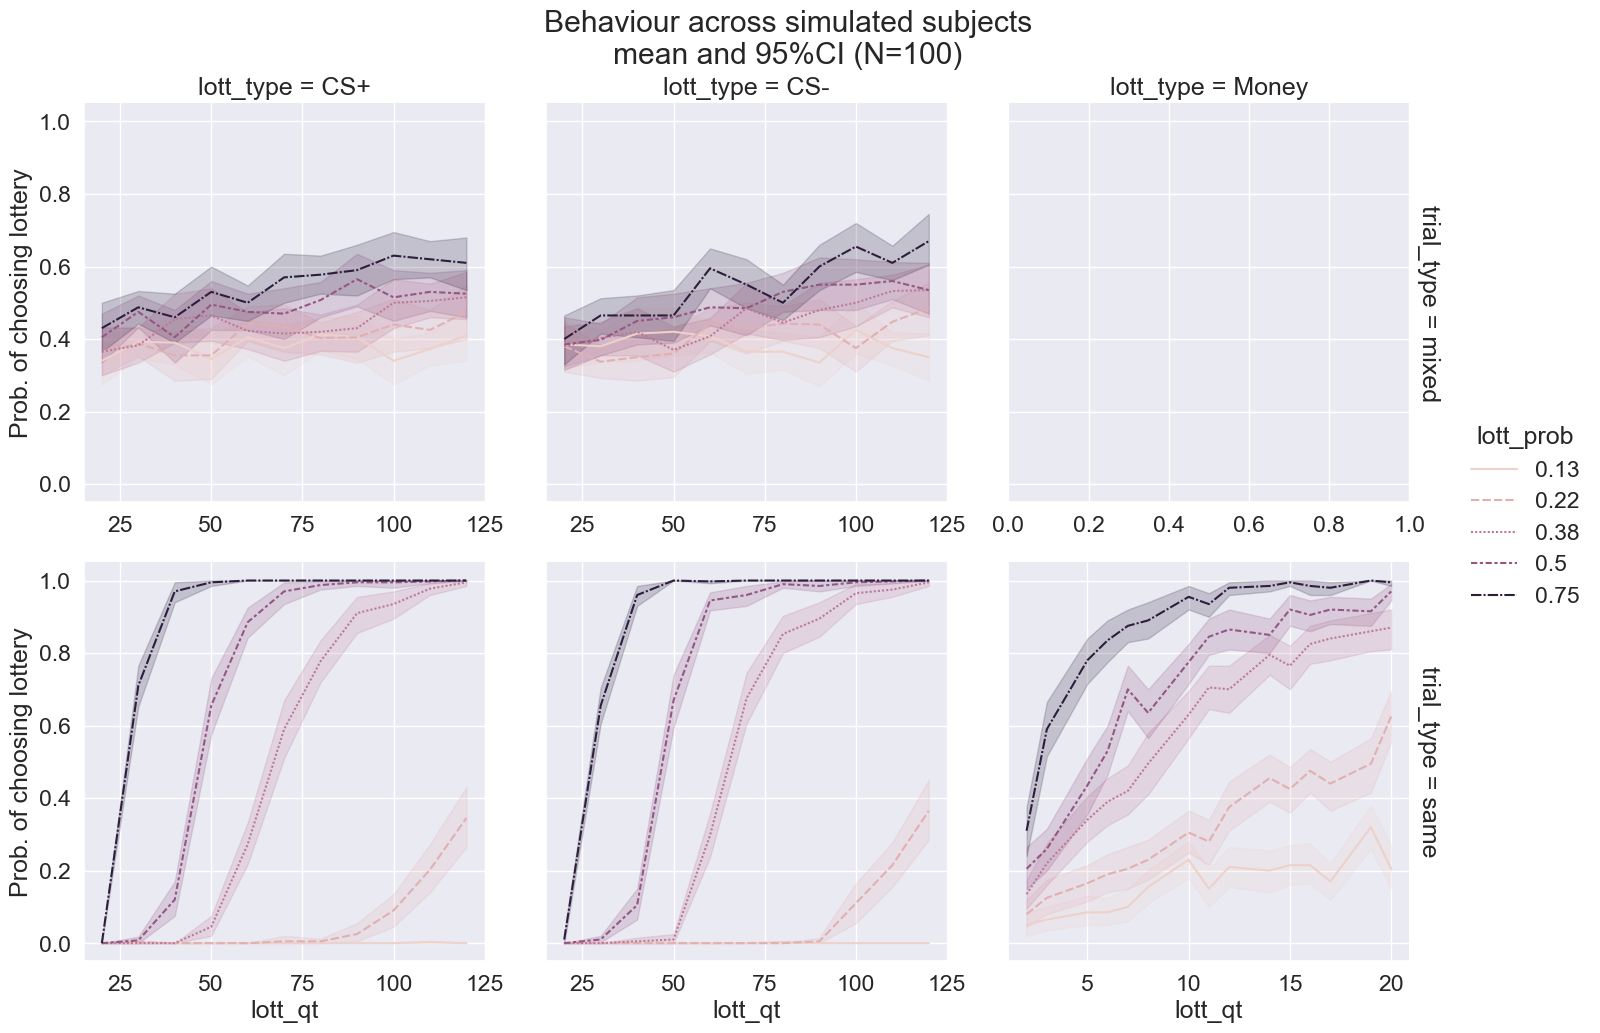

In [45]:
# INPUTS
allTrials_df = allTrials_df.copy()
N_subs = 100
x0 = x0_6params
#                         (mean, sd)
mean_std_st_money_alpha = (0.7, 0.1)
mean_std_st_cPlus_alpha = (0.8, 0.1)
mean_std_st_cMinus_alpha = (0.8, 0.1)
mean_std_st_money_beta = (1.8, 0.3)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = (10, 0.3)
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.02, 0.005)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

plot_behaviour = True
output = 'long_flags'

(st_pars, mt_pars, 
 st_estPars, mt_estPars, 
 st_hessians, mt_hessians, 
 st_iterParams_df, mt_iterParams_df, 
 st_flags, mt_flags) = simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                    mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                    mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                    mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                    mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                    plot_behaviour = True, startFromBehaviour = True,
                                    N_optimizers=20, output = 'long_flags')

In [46]:
print('Same type parameters')
print(20*'-')
print('cohort mean              {}'.format(np.round(st_estPars.mean(axis = 1), 3)))
print('cohort sd                {}'.format(np.round(st_estPars.std(axis = 1), 3)))
print('mean 95CI of estimates   {}'.format(np.round(1.96*np.sqrt(np.diag(st_hessians.mean(axis = 2))),3)))
print(20 * '=')
print('\nMixed type parameters')
print(20*'-')
print('cohort mean              {}'.format(np.round(mt_estPars.mean(axis = 1), 3)))
print('cohort sd                {}'.format(np.round(mt_estPars.std(axis = 1), 3)))
print('mean 95CI of estimates   {}'.format(np.round(1.96*np.sqrt(np.diag(mt_hessians.mean(axis = 2))),3)))

Same type parameters
--------------------
cohort mean              [0.679 0.792 0.804 1.865]
cohort sd                [0.106 0.098 0.09  0.395]
mean 95CI of estimates   [0.087 0.045 0.045 0.53 ]

Mixed type parameters
--------------------
cohort mean              [0.02  0.019]
cohort sd                [0.011 0.01 ]
mean 95CI of estimates   [0.016 0.016]


#### Pack same type trials results and plot parameters

In [77]:
st_success_df = pd.DataFrame(st_flags, columns = ['model fit'])
st_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'beta']
else:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ ST beta', 'CS- ST beta']


st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'n_sub'
st_params_df = st_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')

# st_params_df
st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df.index.name = 'n_sub'
# st_estParams_df

st_estParams_df = st_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

st_po_df = st_params_df.merge(st_estParams_df, on= ['n_sub','parameter'])
st_po_df = st_po_df.merge(st_success_df.reset_index(),on='n_sub')
# st_po_df

print(sorted(list(st_po_df['model fit'].unique()), reverse=True))
st_pars_minMax = st_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(st_params_colNames)
# st_pars_minMax

col_wrap = 3
fig = px.scatter(st_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':st_params_colNames,
                                  'model fit':sorted(list(st_po_df['model fit'].unique()), reverse=True) },
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (same type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )


fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, x1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       y0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, y1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[0,0], x1=st_pars_minMax.iloc[0,1], 
                       y0=st_pars_minMax.iloc[0,0], y1=st_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, x1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       y0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, y1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=2,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, x1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       y0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, y1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )


if x0 != x0_6params:
    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, x1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       y0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, y1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=0,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, x1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       y0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, y1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=2,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed same type parameters.html")


['Optimization terminated successfully.', 'Desired error not necessarily achieved due to precision loss.']


#### Pack mixed type trials results and plot parameters

In [47]:
mt_success_df = pd.DataFrame(mt_flags, columns = ['model fit'])
mt_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    mt_params_colNames = ['CS+ sFactor', 'CS- sFactor',]
else:
    mt_params_colNames = ['CS+ MT beta', 'CS- MT beta', 
                          'CS+ sFactor', 'CS- sFactor',]


mt_params_df = pd.DataFrame(mt_pars).T
mt_params_df.columns= mt_params_colNames
mt_params_df.index.name = 'n_sub'
mt_params_df = mt_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')


mt_estParams_df = pd.DataFrame(mt_estPars).T
mt_estParams_df.columns= mt_params_colNames
mt_estParams_df.index.name = 'n_sub'
mt_estParams_df = mt_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

mt_po_df = mt_params_df.merge(mt_estParams_df, on= ['n_sub','parameter'])
mt_po_df = mt_po_df.merge(mt_success_df.reset_index(),on='n_sub')
# mt_po_df
print(mt_po_df['model fit'].unique())
mt_pars_minMax = mt_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(mt_params_colNames)
# mt_pars_minMax

col_wrap = 2
fig = px.scatter(mt_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':mt_params_colNames,
                                  'model fit': sorted(list(mt_po_df['model fit'].unique()), reverse=True)},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (mixed type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, x1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       y0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, y1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, x1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       y0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, y1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )


    
fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed mixed type parameters.html")

['Desired error not necessarily achieved due to precision loss.'
 'Optimization terminated successfully.']


### 15 samples, 2 rep

In [82]:
uniqueLott_Nreps = 1      # Unique Lottery Repititions  
n_samples = 12

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = np.round(np.linspace(0.13, .75, n_samples), 2)
st_lottPs = list(st_lottPs)   # Lottery option

# Same-type task variables
st_money_refQs = [2]                               # Euros
st_money_lottQs_arr = np.round(np.linspace(2, 20, n_samples), 0)
st_money_lottQs = list(st_money_lottQs_arr)

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs_arr = np.round(np.linspace(20, 120, n_samples)/10, 0)*10
st_cPlus_lottQs = list(st_cPlus_lottQs_arr)      # mL of CS+ yogurt 

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = np.round(np.linspace(0.13, .75, n_samples), 2)
mt_lottPs = list(mt_lottPs)   # Lottery option
mt_cPlus_lottQs_arr = np.round(np.linspace(20, 120, n_samples)/10, 0)*10
mt_cPlus_lottQs = list(mt_cPlus_lottQs_arr)      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))
allTrials_df.head()

Trials per type:
same     432
mixed    288
Name: trial_type, dtype: int64


trial_type ref_type  ref_qt  ref_prob lott_type  lott_qt  lott_prob
0       same    Money     2.0         1     Money      2.0       0.13
1       same    Money     2.0         1     Money      2.0       0.19
2       same    Money     2.0         1     Money      2.0       0.24
3       same    Money     2.0         1     Money      2.0       0.30
4       same    Money     2.0         1     Money      2.0       0.36

Running 20 optimizers per subject with random initial estimates
Starting optimization from true parameters


100%|██████████| 100/100 [04:15<00:00,  2.55s/it]


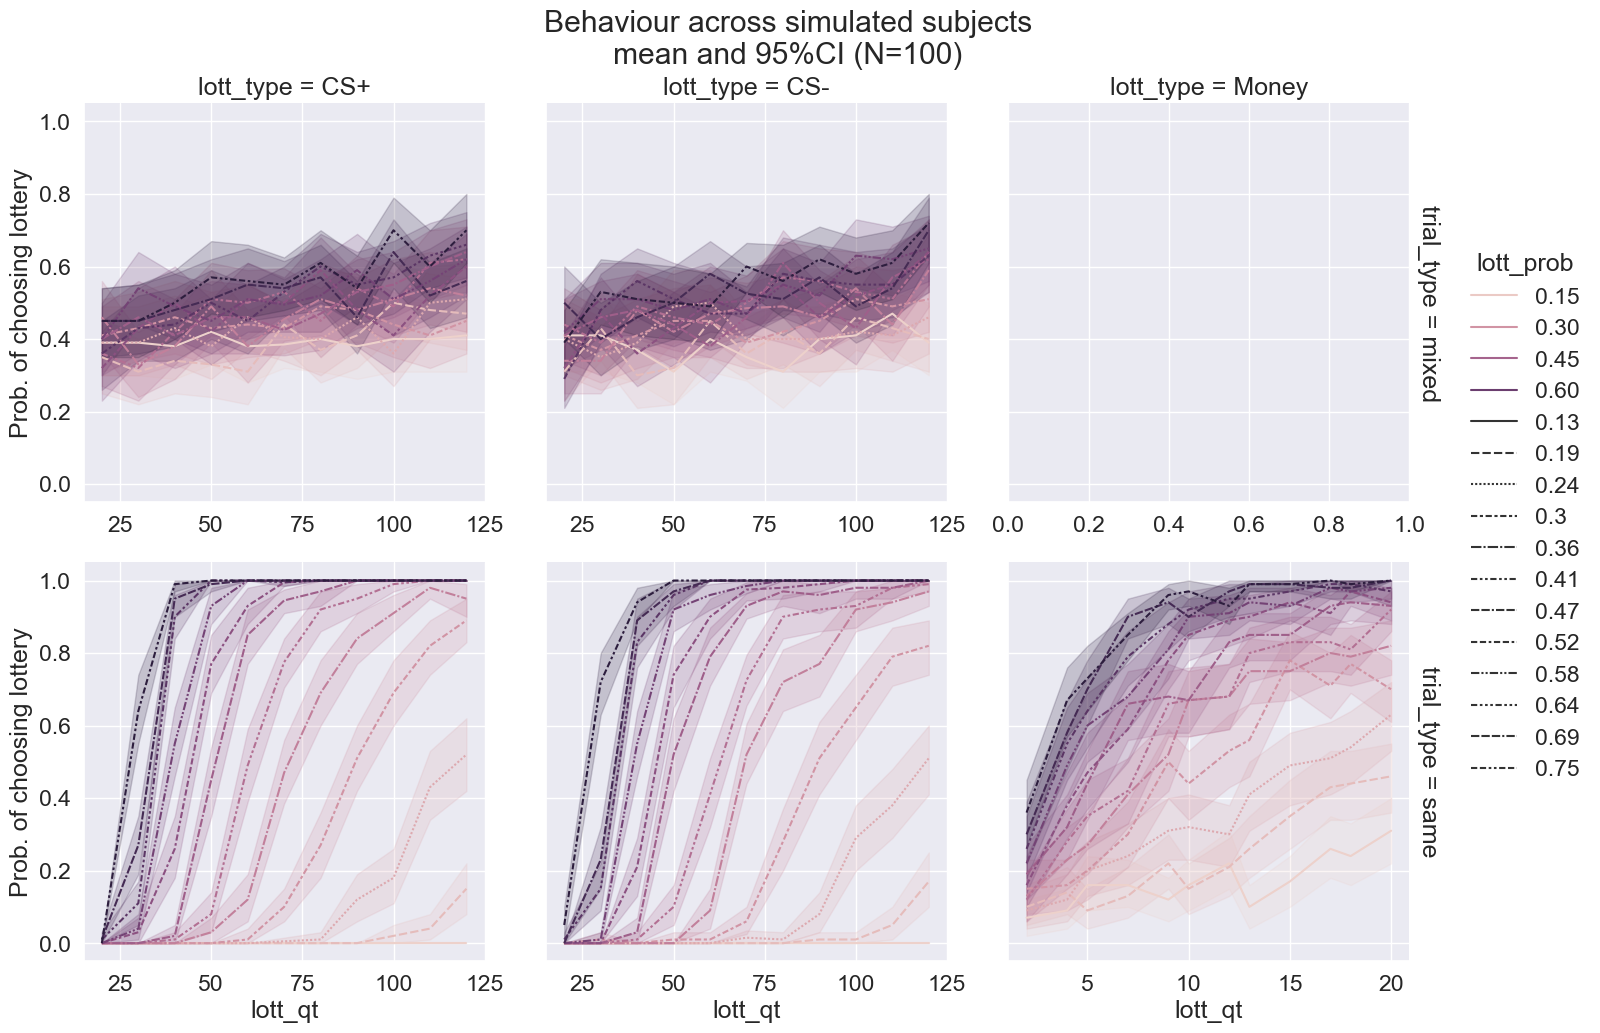

In [83]:
# INPUTS
allTrials_df = allTrials_df.copy()
N_subs = 100
x0 = x0_6params
#                         (mean, sd)
mean_std_st_money_alpha = (0.7, 0.1)
mean_std_st_cPlus_alpha = (0.8, 0.1)
mean_std_st_cMinus_alpha = (0.8, 0.1)
mean_std_st_money_beta = (1.8, 0.3)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = (10, 0.3)
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.02, 0.005)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

plot_behaviour = True
output = 'long_flags'

(st_pars, mt_pars, 
 st_estPars, mt_estPars, 
 st_hessians, mt_hessians, 
 st_iterParams_df, mt_iterParams_df, 
 st_flags, mt_flags) = simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                    mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                    mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                    mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                    mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                    plot_behaviour = True, startFromBehaviour = True,
                                    N_optimizers=20, output = 'long_flags')

#### Pack same type trials results and plot parameters

In [84]:
st_success_df = pd.DataFrame(st_flags, columns = ['model fit'])
st_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'beta']
else:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ ST beta', 'CS- ST beta']


st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'n_sub'
st_params_df = st_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')

# st_params_df
st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df.index.name = 'n_sub'
# st_estParams_df

st_estParams_df = st_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

st_po_df = st_params_df.merge(st_estParams_df, on= ['n_sub','parameter'])
st_po_df = st_po_df.merge(st_success_df.reset_index(),on='n_sub')
# st_po_df

print(sorted(list(st_po_df['model fit'].unique()), reverse=True))
st_pars_minMax = st_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(st_params_colNames)
# st_pars_minMax

col_wrap = 3
fig = px.scatter(st_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':st_params_colNames,
                                  'model fit':sorted(list(st_po_df['model fit'].unique()), reverse=True) },
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (same type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )


fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, x1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       y0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, y1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[0,0], x1=st_pars_minMax.iloc[0,1], 
                       y0=st_pars_minMax.iloc[0,0], y1=st_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, x1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       y0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, y1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=2,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, x1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       y0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, y1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )


if x0 != x0_6params:
    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, x1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       y0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, y1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=0,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, x1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       y0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, y1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=2,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed same type parameters.html")


['Optimization terminated successfully.', 'Desired error not necessarily achieved due to precision loss.']


#### Pack mixed type trials results and plot parameters

In [85]:
mt_success_df = pd.DataFrame(mt_flags, columns = ['model fit'])
mt_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    mt_params_colNames = ['CS+ sFactor', 'CS- sFactor',]
else:
    mt_params_colNames = ['CS+ MT beta', 'CS- MT beta', 
                          'CS+ sFactor', 'CS- sFactor',]


mt_params_df = pd.DataFrame(mt_pars).T
mt_params_df.columns= mt_params_colNames
mt_params_df.index.name = 'n_sub'
mt_params_df = mt_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')


mt_estParams_df = pd.DataFrame(mt_estPars).T
mt_estParams_df.columns= mt_params_colNames
mt_estParams_df.index.name = 'n_sub'
mt_estParams_df = mt_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

mt_po_df = mt_params_df.merge(mt_estParams_df, on= ['n_sub','parameter'])
mt_po_df = mt_po_df.merge(mt_success_df.reset_index(),on='n_sub')
# mt_po_df
print(mt_po_df['model fit'].unique())
mt_pars_minMax = mt_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(mt_params_colNames)
# mt_pars_minMax

col_wrap = 2
fig = px.scatter(mt_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':mt_params_colNames,
                                  'model fit': sorted(list(mt_po_df['model fit'].unique()), reverse=True)},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (mixed type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, x1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       y0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, y1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, x1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       y0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, y1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )


    
fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed mixed type parameters.html")

['Optimization terminated successfully.'
 'Desired error not necessarily achieved due to precision loss.']


### Jitter samples, 2 rep

0.9400000000000001

In [ ]:
# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [2]                               # Euros
st_money_lottQs = [2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [20, 40, 80, 120]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 

In [ ]:
uniqueLott_Nreps = 1      # Unique Lottery Repititions  
n_samples = 12

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = np.round(np.linspace(0.13, .75, n_samples), 2)
st_lottPs = list(st_lottPs)   # Lottery option

# Same-type task variables
st_money_refQs = [2]                               # Euros
st_money_lottQs_arr = np.round(np.linspace(2, 20, n_samples), 0)
st_money_lottQs = list(st_money_lottQs_arr)

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs_arr = np.round(np.linspace(20, 120, n_samples)/10, 0)*10
st_cPlus_lottQs = list(st_cPlus_lottQs_arr)      # mL of CS+ yogurt 

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = np.round(np.linspace(0.13, .75, n_samples), 2)
mt_lottPs = list(mt_lottPs)   # Lottery option
mt_cPlus_lottQs_arr = np.round(np.linspace(20, 120, n_samples)/10, 0)*10
mt_cPlus_lottQs = list(mt_cPlus_lottQs_arr)      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))
allTrials_df.head()

Trials per type:
same     432
mixed    288
Name: trial_type, dtype: int64


trial_type ref_type  ref_qt  ref_prob lott_type  lott_qt  lott_prob
0       same    Money     2.0         1     Money      2.0       0.13
1       same    Money     2.0         1     Money      2.0       0.19
2       same    Money     2.0         1     Money      2.0       0.24
3       same    Money     2.0         1     Money      2.0       0.30
4       same    Money     2.0         1     Money      2.0       0.36

Running 20 optimizers per subject with random initial estimates
Starting optimization from true parameters


100%|██████████| 100/100 [04:15<00:00,  2.55s/it]


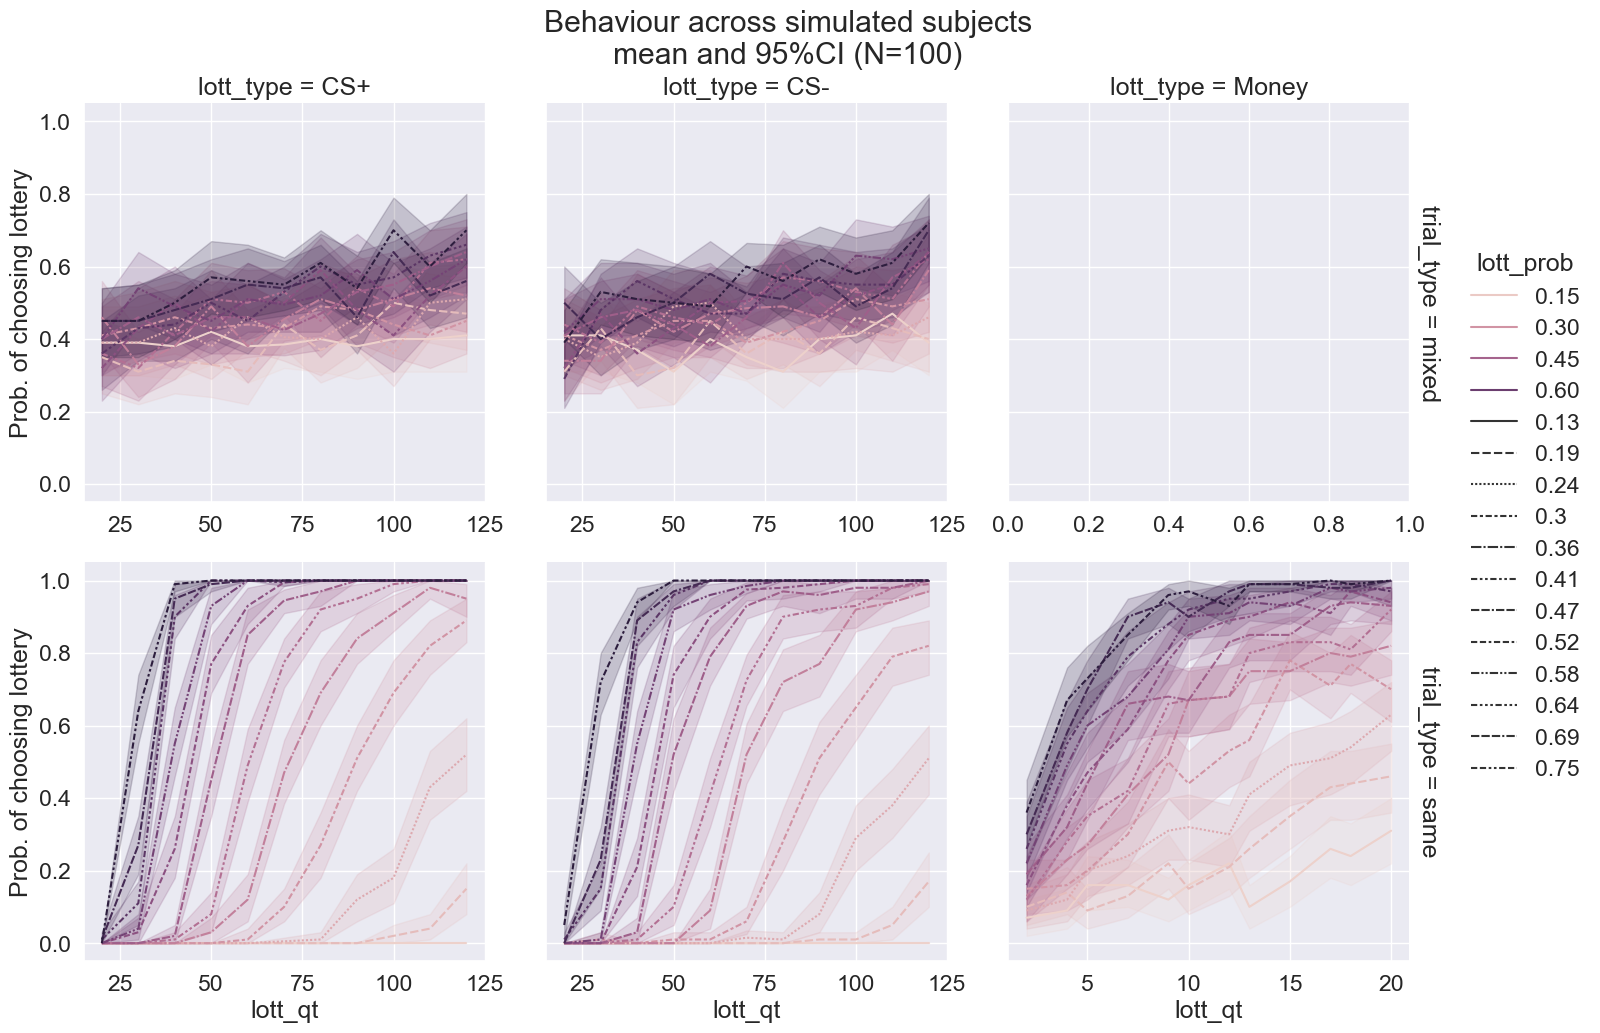

In [ ]:
# INPUTS
allTrials_df = allTrials_df.copy()
N_subs = 100
x0 = x0_6params
#                         (mean, sd)
mean_std_st_money_alpha = (0.7, 0.1)
mean_std_st_cPlus_alpha = (0.8, 0.1)
mean_std_st_cMinus_alpha = (0.8, 0.1)
mean_std_st_money_beta = (1.8, 0.3)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = (10, 0.3)
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.02, 0.005)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

plot_behaviour = True
output = 'long_flags'

(st_pars, mt_pars, 
 st_estPars, mt_estPars, 
 st_hessians, mt_hessians, 
 st_iterParams_df, mt_iterParams_df, 
 st_flags, mt_flags) = simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                    mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                    mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                    mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                    mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                    plot_behaviour = True, startFromBehaviour = True,
                                    N_optimizers=20, output = 'long_flags')

#### Pack same type trials results and plot parameters

In [ ]:
st_success_df = pd.DataFrame(st_flags, columns = ['model fit'])
st_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'beta']
else:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ ST beta', 'CS- ST beta']


st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'n_sub'
st_params_df = st_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')

# st_params_df
st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df.index.name = 'n_sub'
# st_estParams_df

st_estParams_df = st_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

st_po_df = st_params_df.merge(st_estParams_df, on= ['n_sub','parameter'])
st_po_df = st_po_df.merge(st_success_df.reset_index(),on='n_sub')
# st_po_df

print(sorted(list(st_po_df['model fit'].unique()), reverse=True))
st_pars_minMax = st_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(st_params_colNames)
# st_pars_minMax

col_wrap = 3
fig = px.scatter(st_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':st_params_colNames,
                                  'model fit':sorted(list(st_po_df['model fit'].unique()), reverse=True) },
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (same type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )


fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, x1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       y0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, y1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[0,0], x1=st_pars_minMax.iloc[0,1], 
                       y0=st_pars_minMax.iloc[0,0], y1=st_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, x1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       y0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, y1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=2,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, x1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       y0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, y1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )


if x0 != x0_6params:
    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, x1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       y0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, y1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=0,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, x1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       y0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, y1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=2,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed same type parameters.html")


['Optimization terminated successfully.', 'Desired error not necessarily achieved due to precision loss.']


#### Pack mixed type trials results and plot parameters

In [ ]:
mt_success_df = pd.DataFrame(mt_flags, columns = ['model fit'])
mt_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    mt_params_colNames = ['CS+ sFactor', 'CS- sFactor',]
else:
    mt_params_colNames = ['CS+ MT beta', 'CS- MT beta', 
                          'CS+ sFactor', 'CS- sFactor',]


mt_params_df = pd.DataFrame(mt_pars).T
mt_params_df.columns= mt_params_colNames
mt_params_df.index.name = 'n_sub'
mt_params_df = mt_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')


mt_estParams_df = pd.DataFrame(mt_estPars).T
mt_estParams_df.columns= mt_params_colNames
mt_estParams_df.index.name = 'n_sub'
mt_estParams_df = mt_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

mt_po_df = mt_params_df.merge(mt_estParams_df, on= ['n_sub','parameter'])
mt_po_df = mt_po_df.merge(mt_success_df.reset_index(),on='n_sub')
# mt_po_df
print(mt_po_df['model fit'].unique())
mt_pars_minMax = mt_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(mt_params_colNames)
# mt_pars_minMax

col_wrap = 2
fig = px.scatter(mt_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':mt_params_colNames,
                                  'model fit': sorted(list(mt_po_df['model fit'].unique()), reverse=True)},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (mixed type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, x1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       y0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, y1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, x1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       y0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, y1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )


    
fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed mixed type parameters.html")

['Optimization terminated successfully.'
 'Desired error not necessarily achieved due to precision loss.']
